In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl

# setting parameters for default matplotlib plots
%matplotlib inline
pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
pl.rcParams['xtick.labelsize'] = 7
pl.rcParams['ytick.labelsize'] = 7
pl.rcParams['axes.labelsize'] = 7

# needs to find the library of functions
sys.path.append('../../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
NOTEBOOK_NAME = 'psth_SSO_day1'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
vars_SS = {}
folder = '../sucroseAndShock/notebooks/autorestore/preprocessing_SucroseAndShock/'
for var in ('time_ax', 'time_ax_single','events', 'cycles','licks',
            'CYCLE_START', 'ANALYSIS_WINDOW',
            'US_START', 'US_DURATION',
            'is_rewardt', 'is_shockt'): 
    vars_SS.update({var:ut.load_variable(var, folder=folder)})
vars_SS.update({'selectivity':ut.load_variable('selectivity', '../sucroseAndShock/notebooks/autorestore/selectivity_SucroseAndShock/')})
    
vars_O = {}
folder = '../odors/notebooks/autorestore/preprocessing_Odors/'
for var in ('time_ax', 'time_ax_single','events', 'cycles','licks',
            'CYCLE_START', 'ANALYSIS_WINDOW',
            'US_START', 'US_DURATION',
            'is_femalet', 'is_coyotet'): 
    vars_O.update({var:ut.load_variable(var, folder=folder)})
vars_O.update({'selectivity':ut.load_variable('selectivity', '../odors/notebooks/autorestore/selectivity_Odors/')})

In [6]:
input_CellReg_filename = '../../data/CellReg/SSO_day2/cellreg.txt'

In [7]:
output_filename = input_CellReg_filename.split('.')[0]+'cellregSSO_dict.txt'
with open(input_CellReg_filename, 'r') as f:
    header = f.readline()
sessions = header.split()[1:]
cellreg = np.loadtxt(input_CellReg_filename)

#cellreg_dict = dict(zip(sessions, [map(int, c) for c in cellreg.T]))
cellreg_dict = dict(zip(['SS', 'O'], [map(int, c) for c in cellreg.T]))

import json
with open(output_filename, 'w+') as f:
    json.dump(cellreg_dict, f)

In [8]:
conditions = ['SS', 'O']
cellregs = dict(zip(conditions, [ut.load_cellreg_dict('cellregSSO_dict.txt', c) for c in conditions]))

In [9]:
import scipy.stats as sstats

In [10]:
'''rhos = []
for cell_pre, cell_post in zip(cellregs['SS'], cellregs['O']):
    
    rhos_od = []
    for isopre, isopost in zip([vars_pre['is_CSmt'], vars_pre['is_rewardt'], vars_pre['is_rewarded']],
                               [vars_post['is_CSmt'], vars_pre['is_rewardt'], vars_pre['is_rewarded']]):
        alldffspre = ut.compute_all_dffs(vars_pre['time_ax'], vars_pre['events'], cell_pre,
                                         vars_pre['cycles'][isopre], vars_pre['time_ax_single'])
        alldffspost = ut.compute_all_dffs(vars_post['time_ax'], vars_post['events'], cell_post,
                                          vars_post['cycles'][isopost], vars_post['time_ax_single'])

        mpre = np.mean(alldffspre, 0)
        mpost = np.mean(alldffspost, 0)
        
        t_pre, t_post = [vars_pre['CS_DURATION']]*2
        t_filter_pre = (vars_pre['time_ax_single']>-t_pre) * (vars_pre['time_ax_single']<vars_pre['CS_DURATION']+t_post)
        t_pre, t_post = [vars_post['CS_DURATION']]*2
        t_filter_post = (vars_post['time_ax_single']>-t_pre) * (vars_post['time_ax_single']<vars_post['CS_DURATION']+t_post)
        rhos_od.append(sstats.pearsonr(mpre[t_filter_pre], mpost[t_filter_post])[0])
    rhos.append(rhos_od)
    
    print ".",
rhos = np.r_[rhos]'''

'rhos = []\nfor cell_pre, cell_post in zip(cellregs[\'SS\'], cellregs[\'O\']):\n    \n    rhos_od = []\n    for isopre, isopost in zip([vars_pre[\'is_CSmt\'], vars_pre[\'is_rewardt\'], vars_pre[\'is_rewarded\']],\n                               [vars_post[\'is_CSmt\'], vars_pre[\'is_rewardt\'], vars_pre[\'is_rewarded\']]):\n        alldffspre = ut.compute_all_dffs(vars_pre[\'time_ax\'], vars_pre[\'events\'], cell_pre,\n                                         vars_pre[\'cycles\'][isopre], vars_pre[\'time_ax_single\'])\n        alldffspost = ut.compute_all_dffs(vars_post[\'time_ax\'], vars_post[\'events\'], cell_post,\n                                          vars_post[\'cycles\'][isopost], vars_post[\'time_ax_single\'])\n\n        mpre = np.mean(alldffspre, 0)\n        mpost = np.mean(alldffspost, 0)\n        \n        t_pre, t_post = [vars_pre[\'CS_DURATION\']]*2\n        t_filter_pre = (vars_pre[\'time_ax_single\']>-t_pre) * (vars_pre[\'time_ax_single\']<vars_pre[\'CS_DURATION\']+t_

In [11]:
#best_rhos_odor1 = cellregs['pre'][np.argsort(rhos[:, 0])[::-1]]

In [12]:
vars_O['selectivity'].keys()

['female_pre',
 'coyote_us',
 'female_4s_us',
 'coyote_4s_us',
 'female_us',
 'coyote_late',
 'female_late',
 'female_4s_pre',
 'coyote_4s_pre',
 'coyote_pre']

In [13]:
cellregs

{'O': array([ 4, 18, 39, 47, 17, 30, 14,  5,  0, 24, 34, 10,  1, 11, 15, 31, 16,
        29, 48,  2, 44, 25, 49, 12, 23, 51, 55, 26, 69,  7, 36, 22, 21, 13,
         9, 35, 28, 46, 75, 52, 42, 20, 45, 68, 43, 37, 58, 32, 40, 64, 19,
        59, 27, 41, 56, 63, 53, 54, 77,  3, 57]),
 'SS': array([ 1,  2,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 37, 38, 39, 40, 42,
        46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 64, 66,
        69, 71, 72, 74, 75, 81, 82, 84, 95, 97])}

In [14]:
!mkdir ../img

/home/fabios/anaconda2/lib/python2.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


. . . . . . . . . . . . . . . . . . . .

/home/fabios/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

/home/fabios/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


 . .


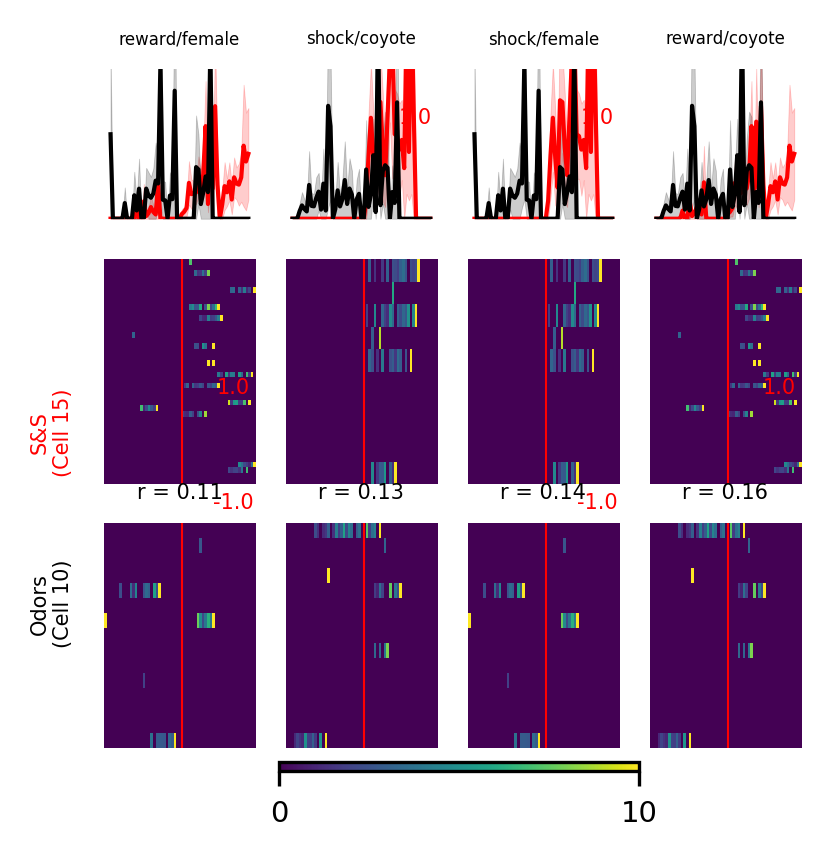

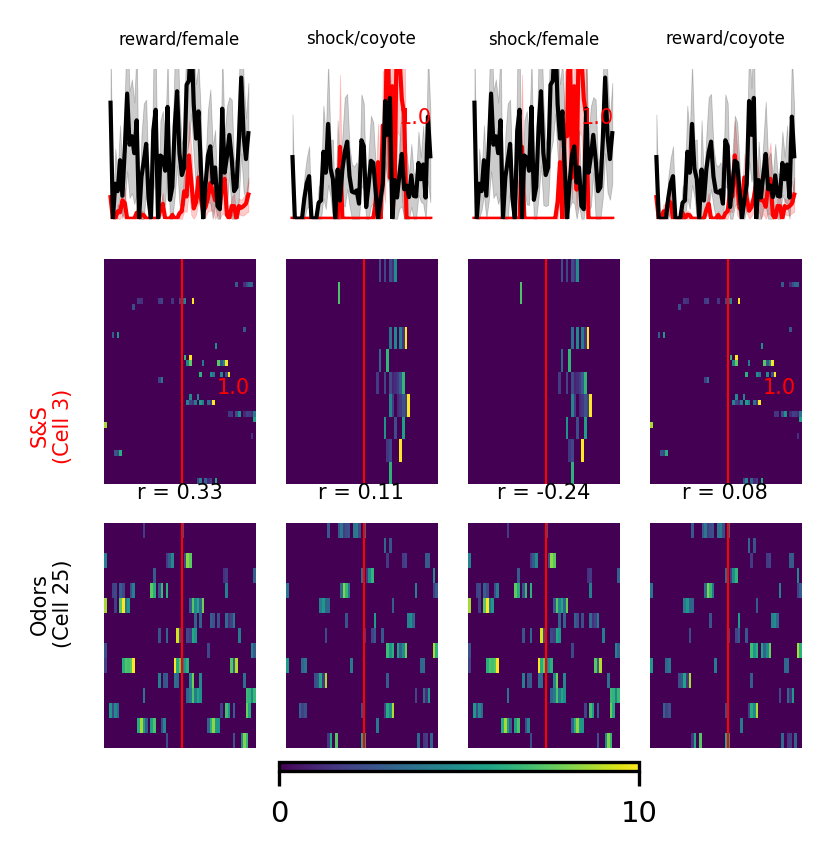

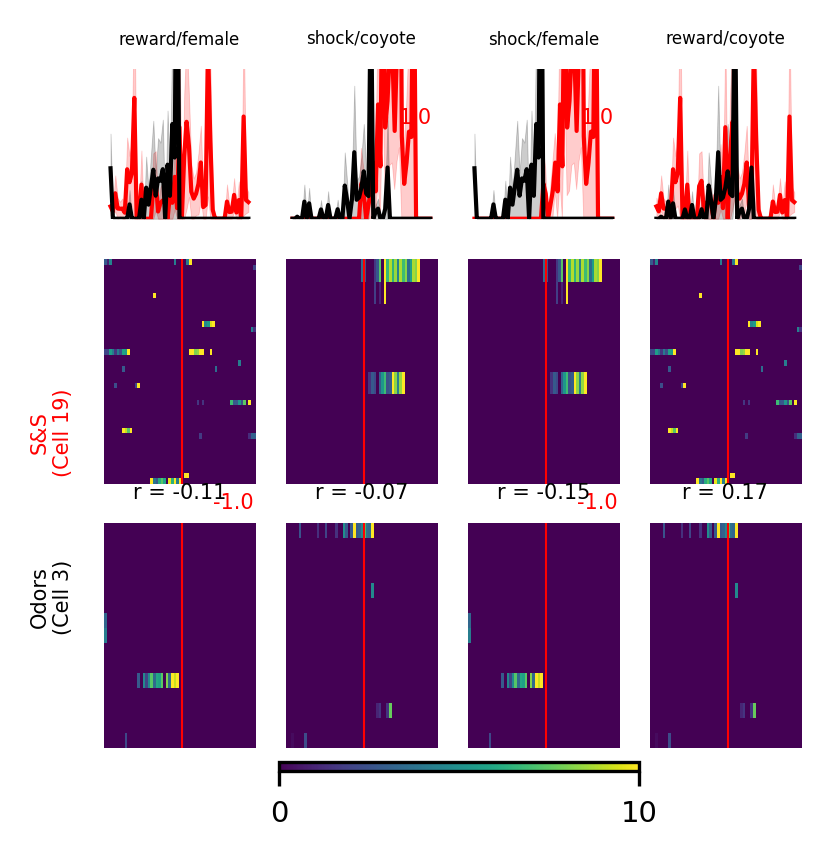

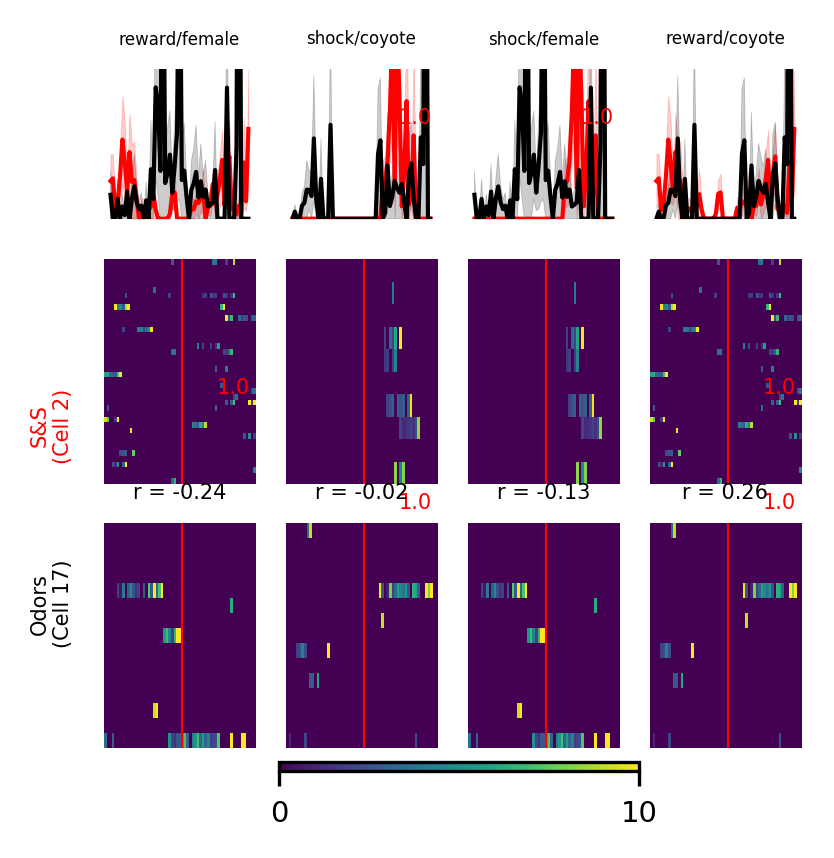

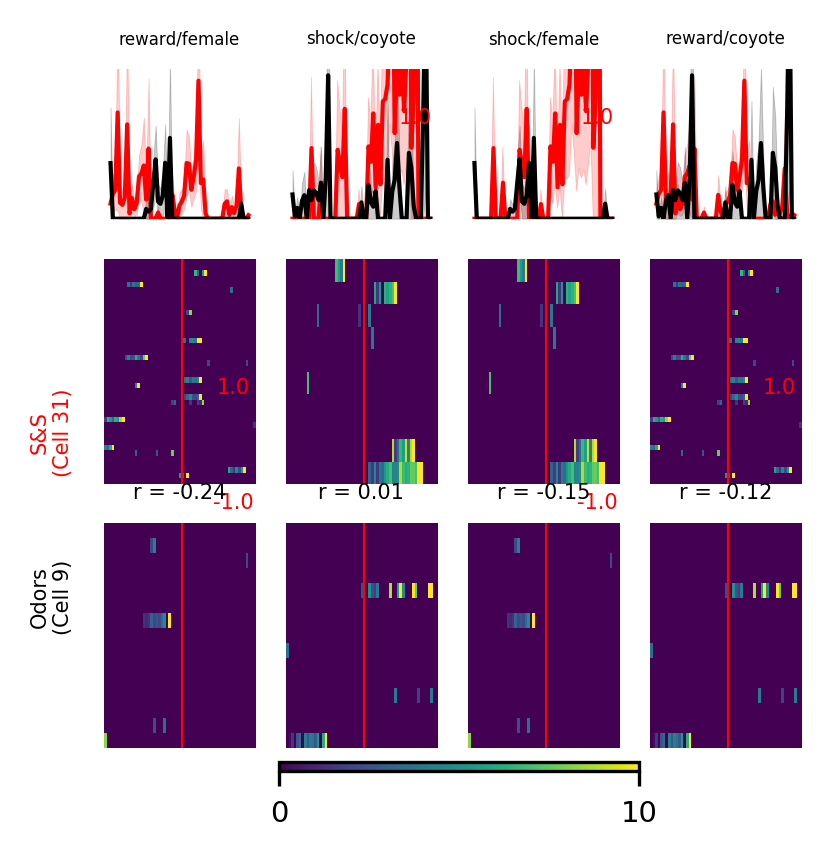

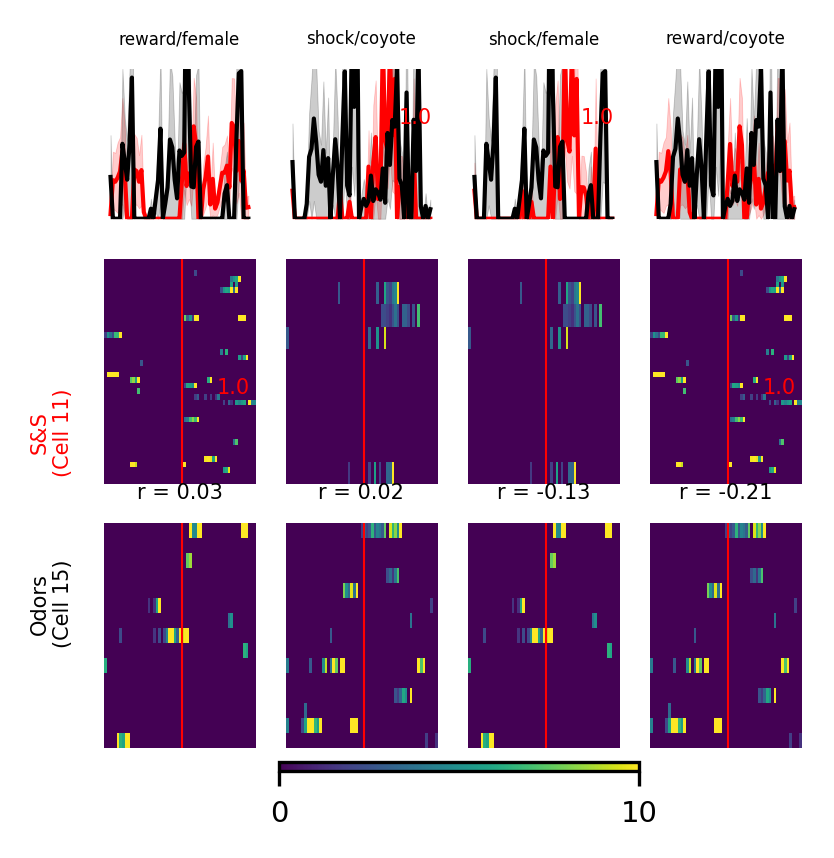

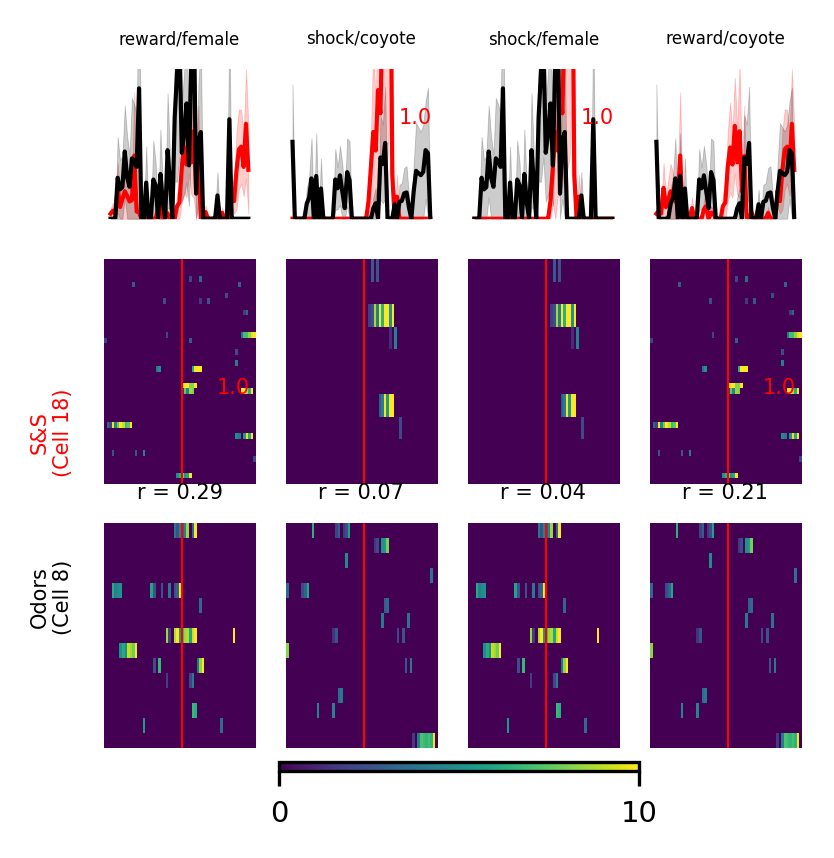

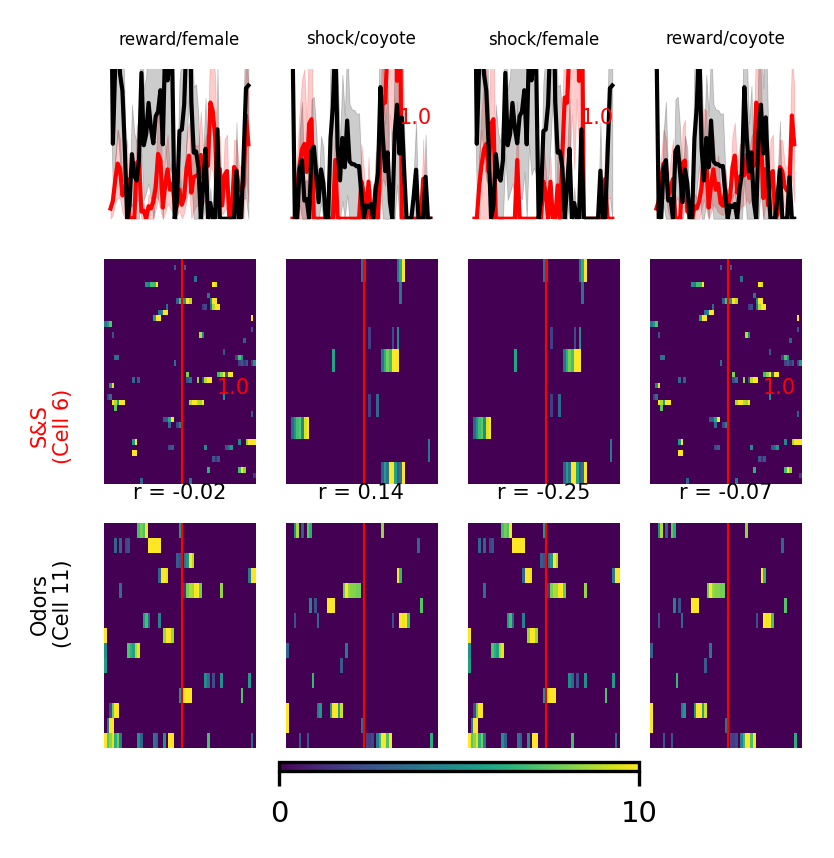

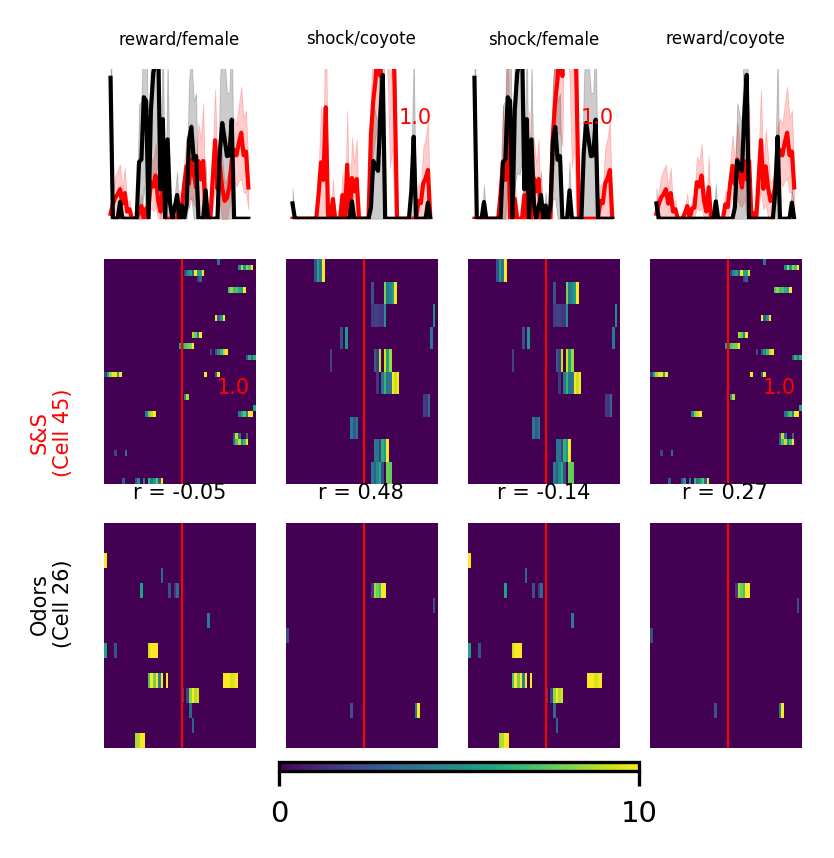

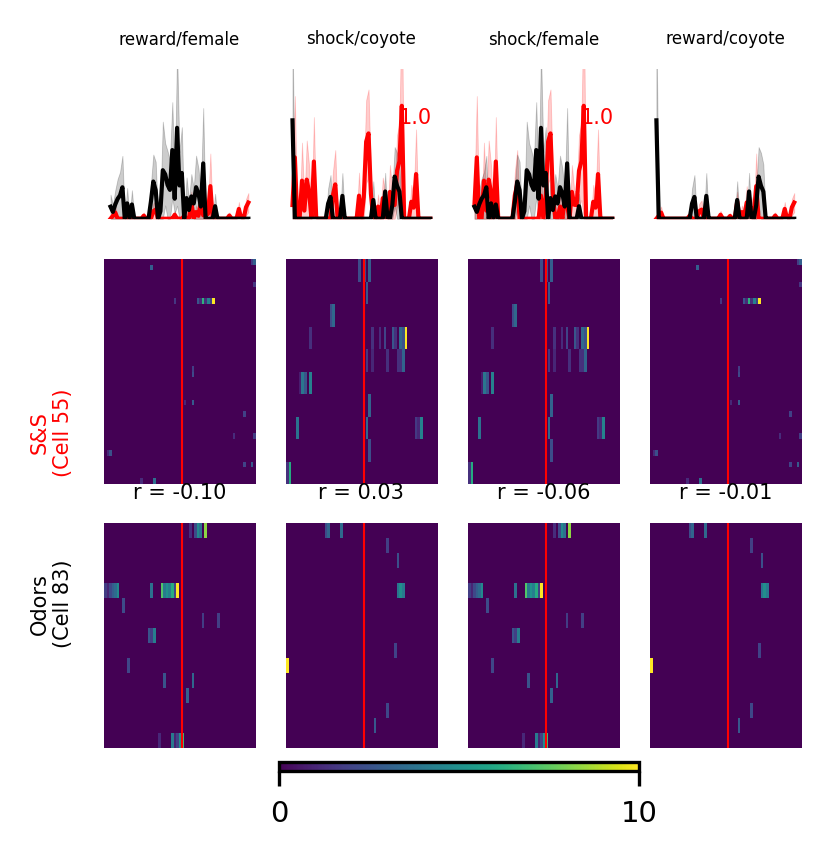

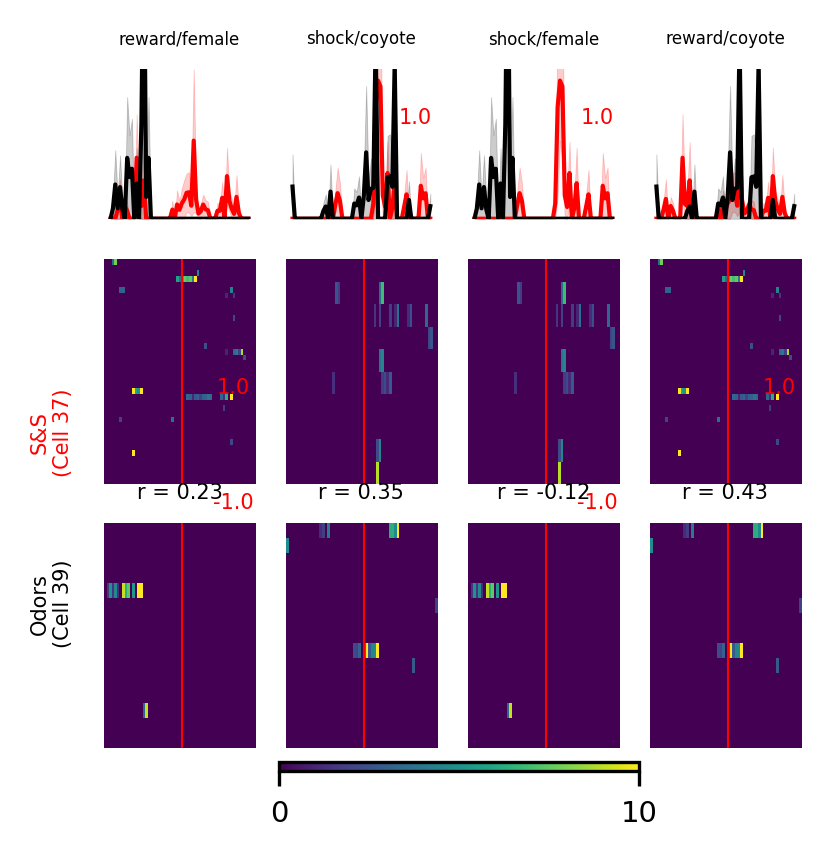

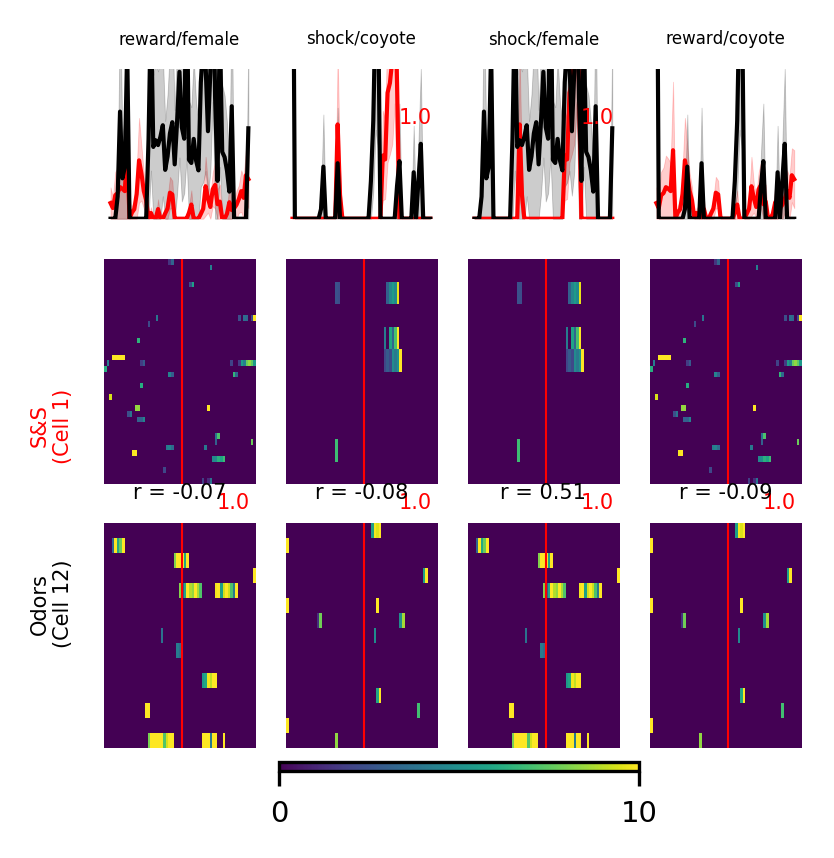

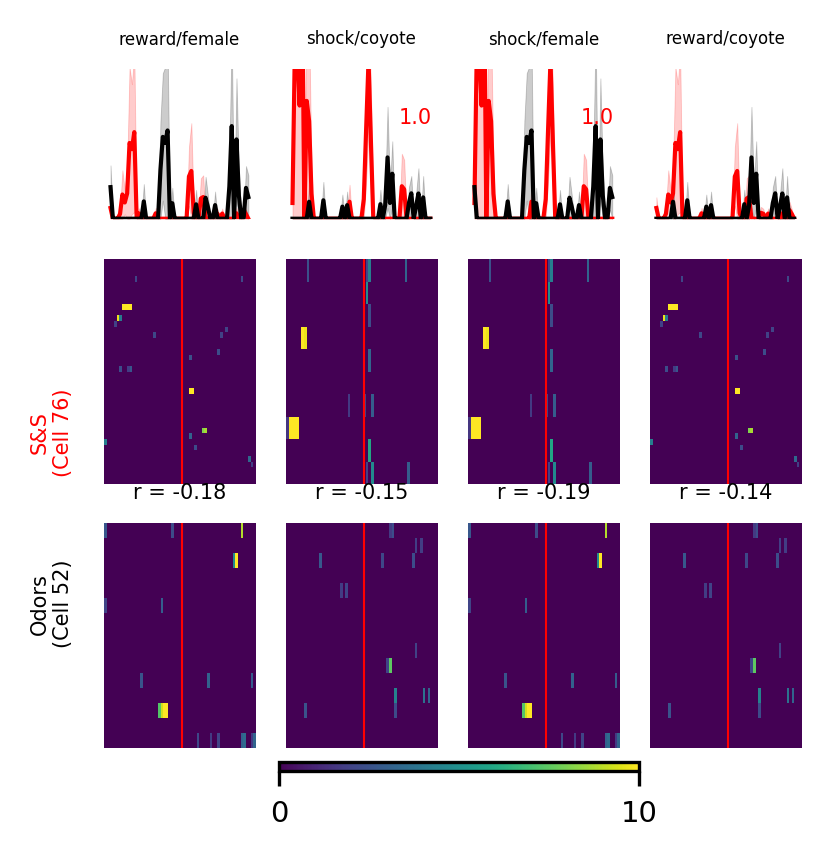

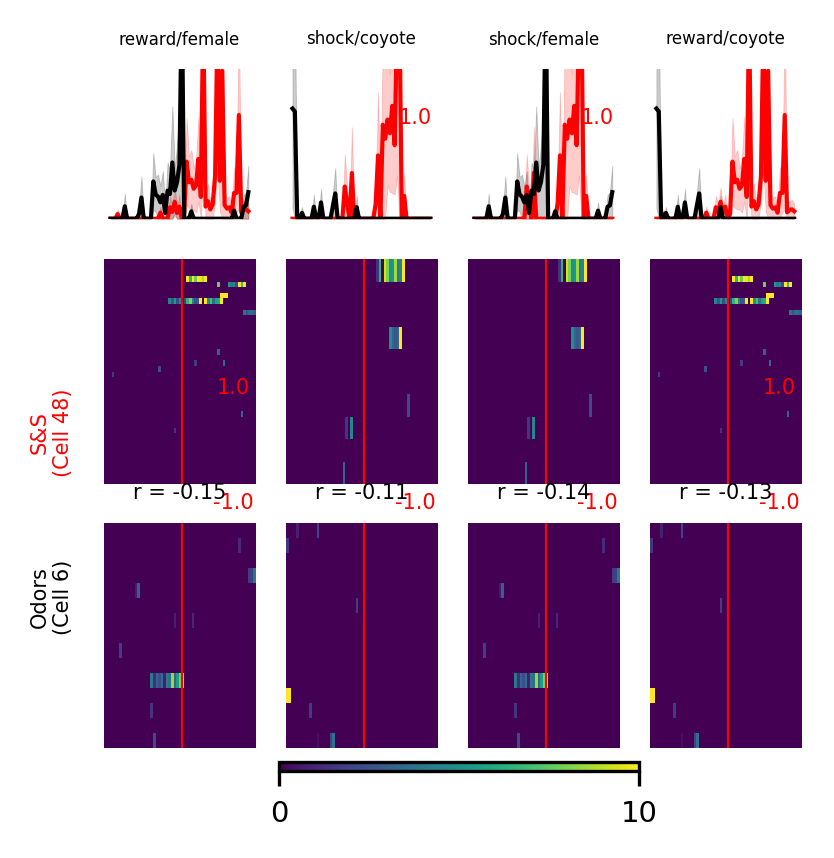

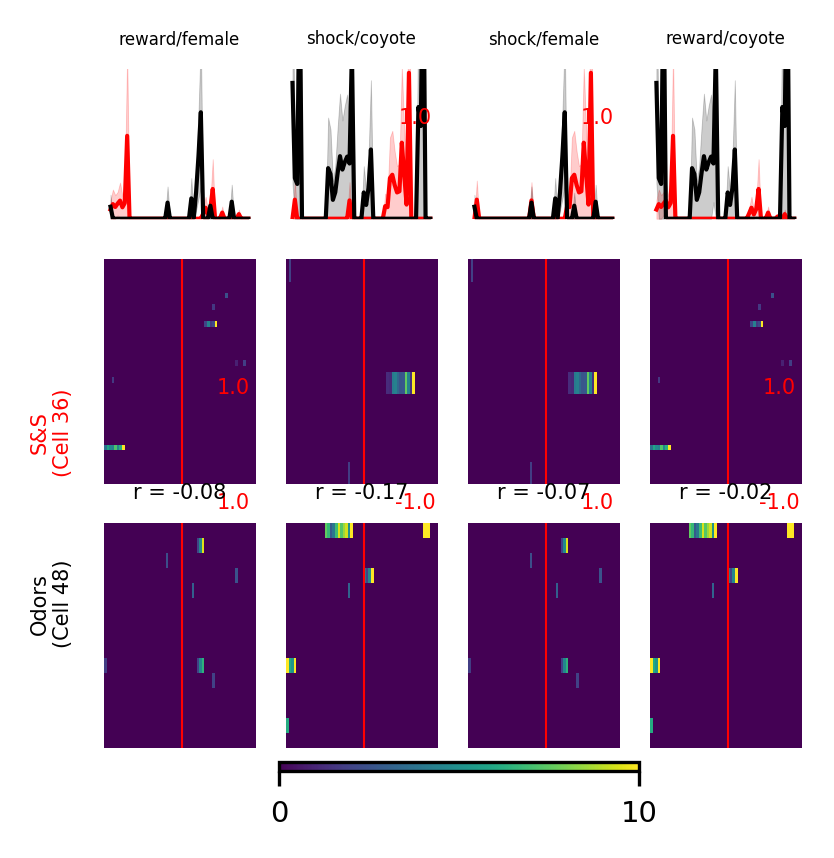

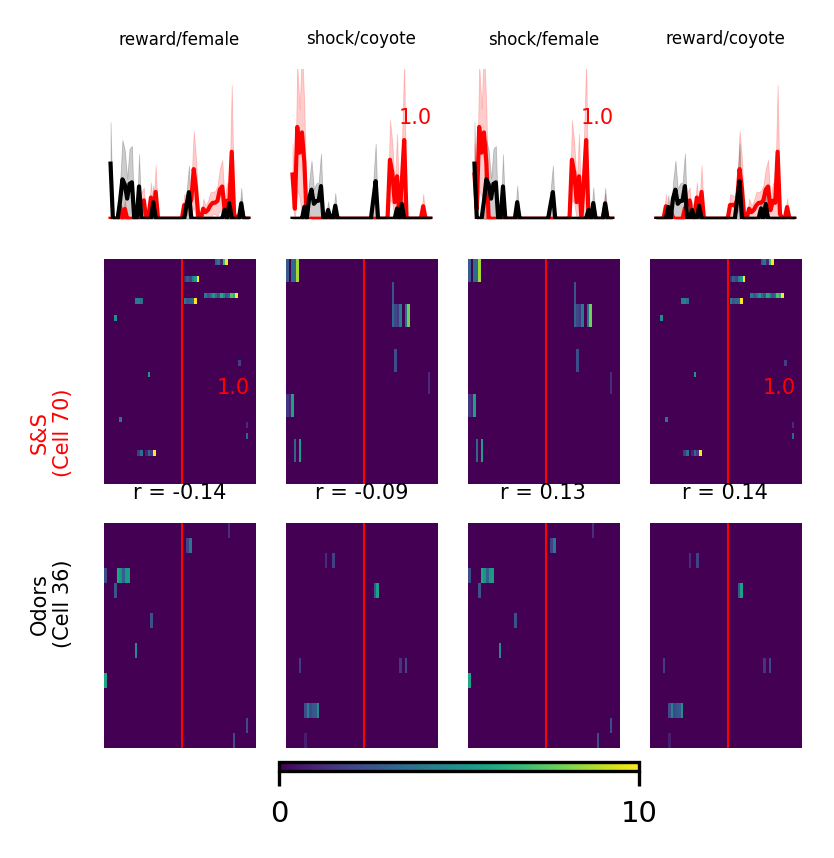

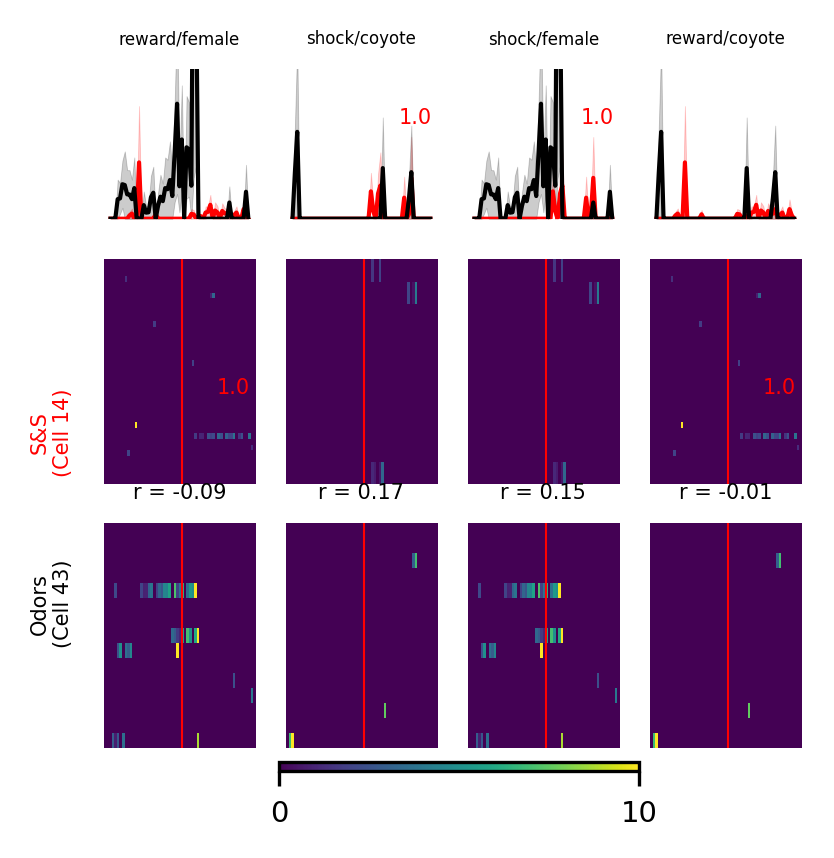

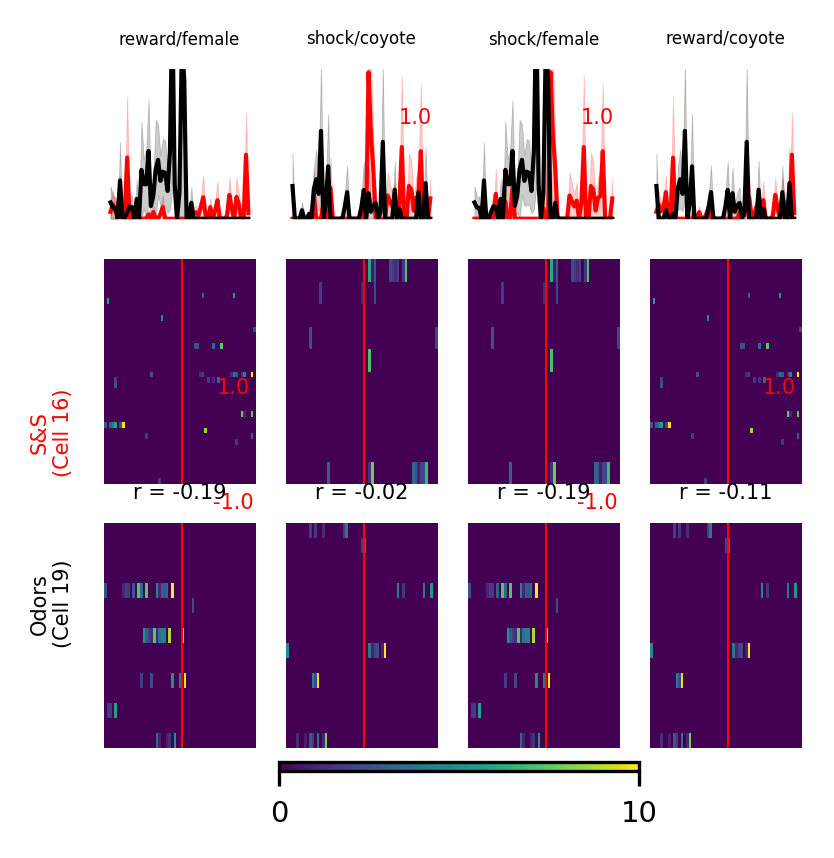

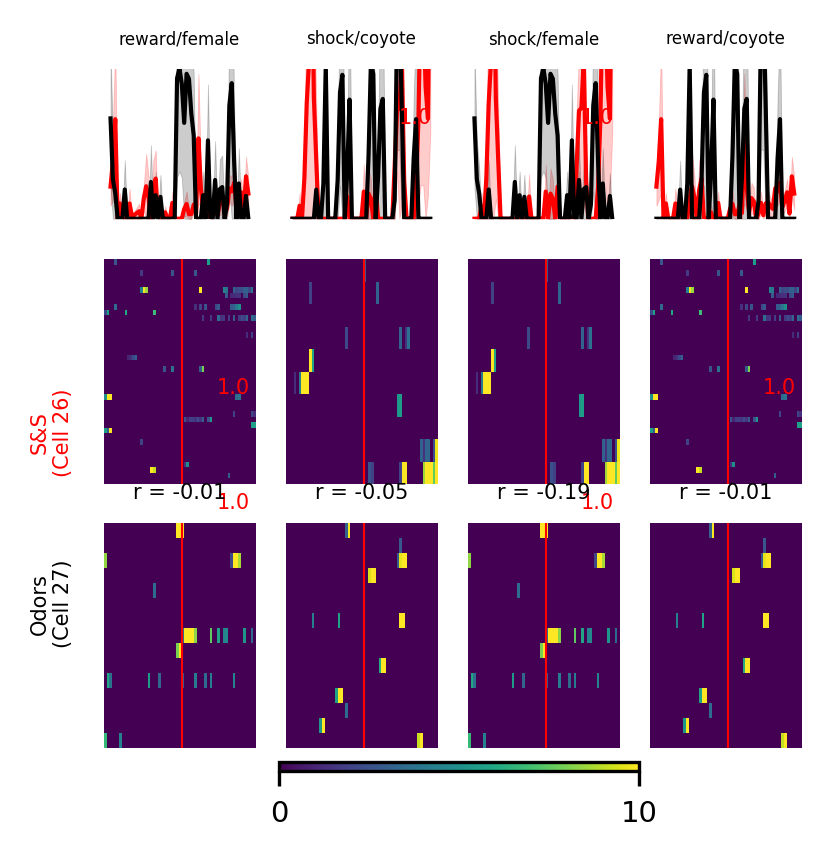

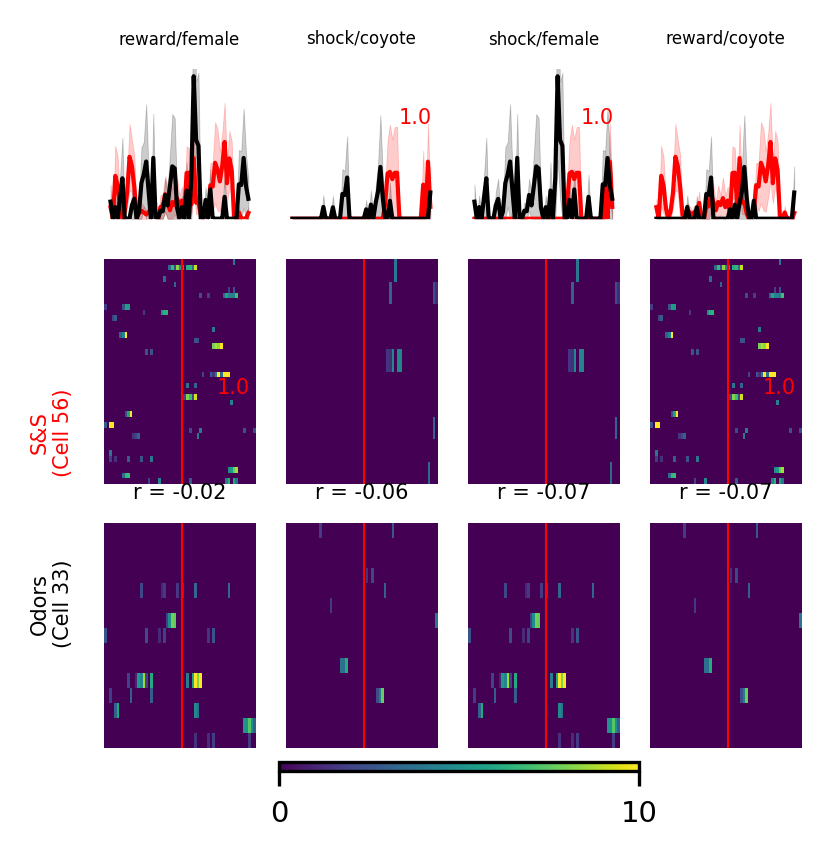

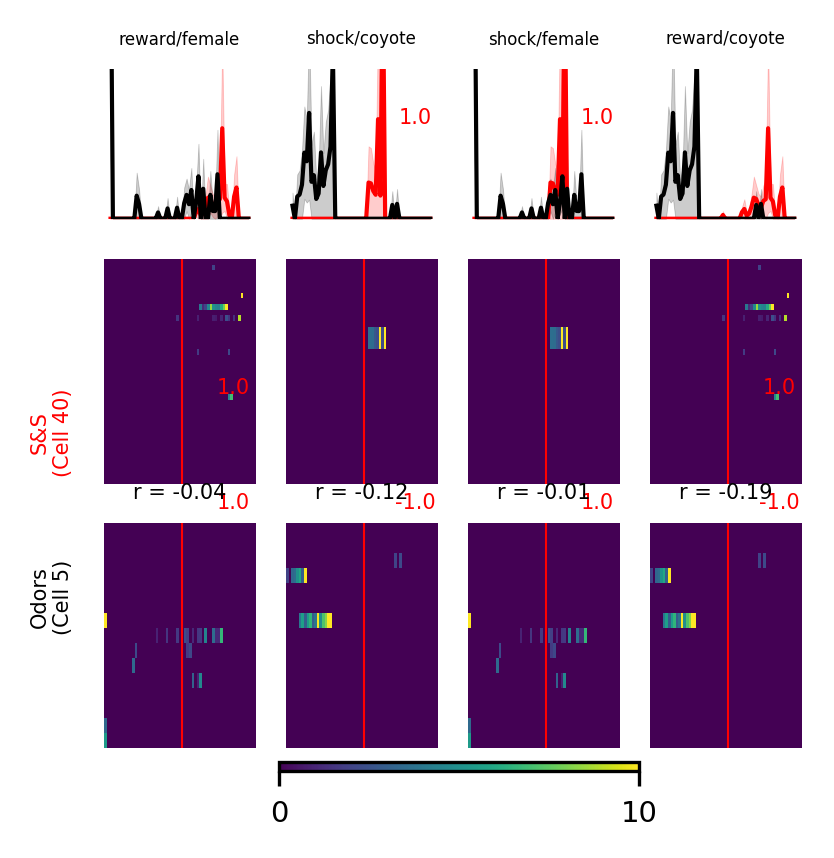

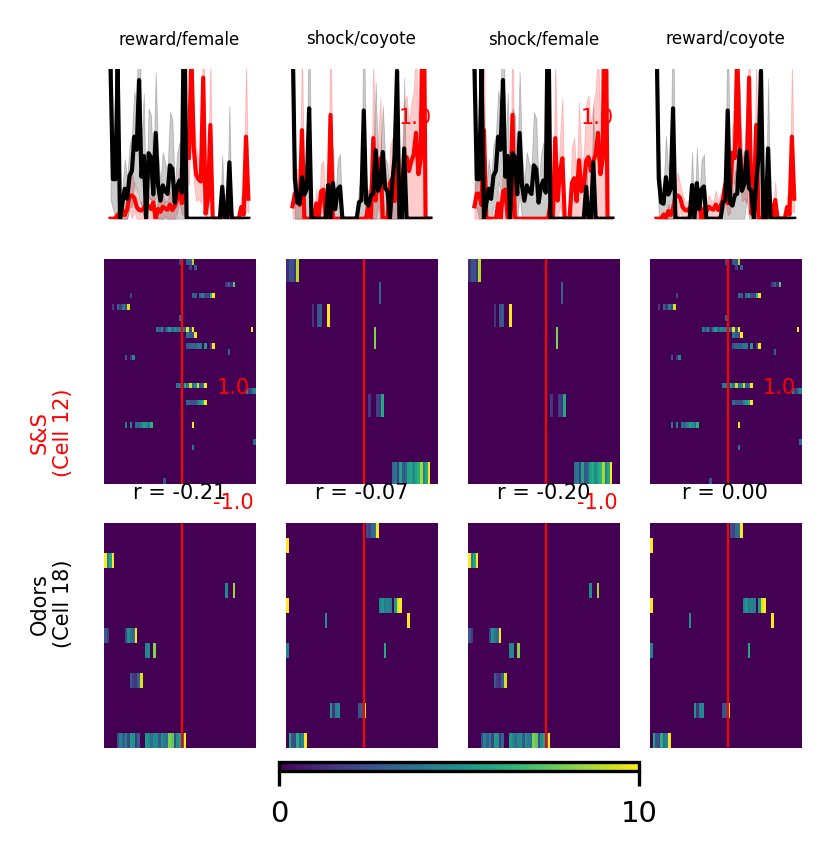

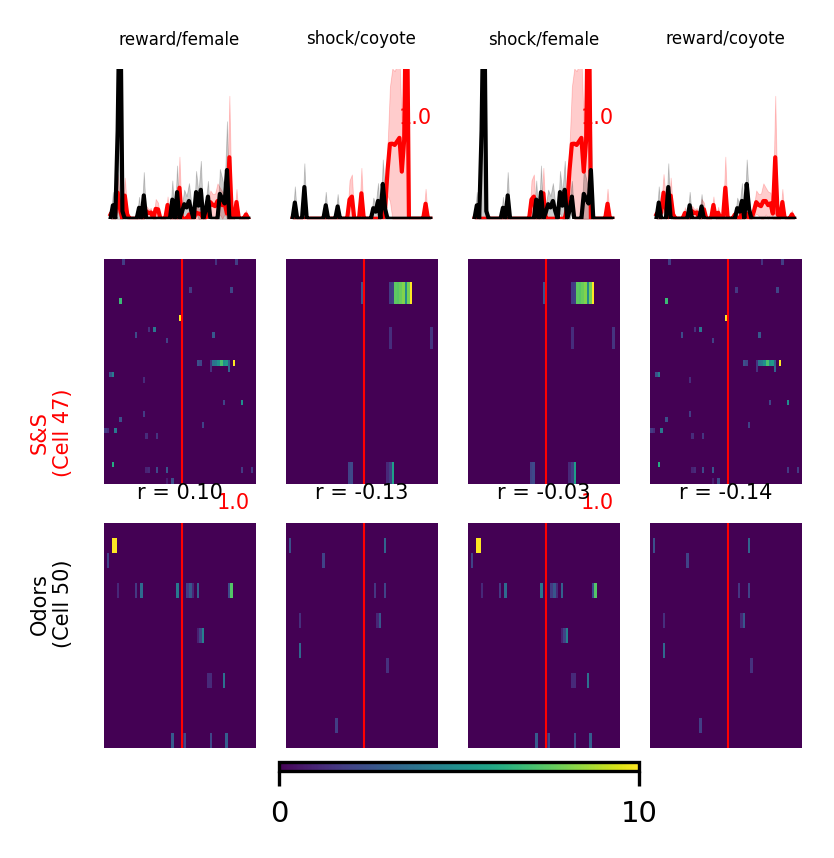

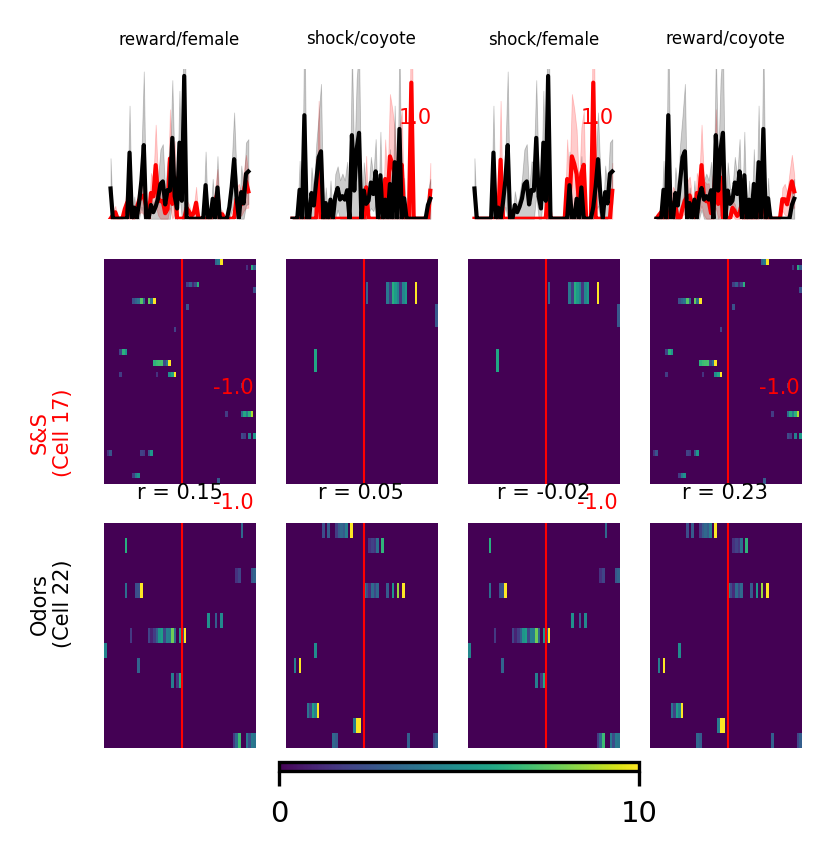

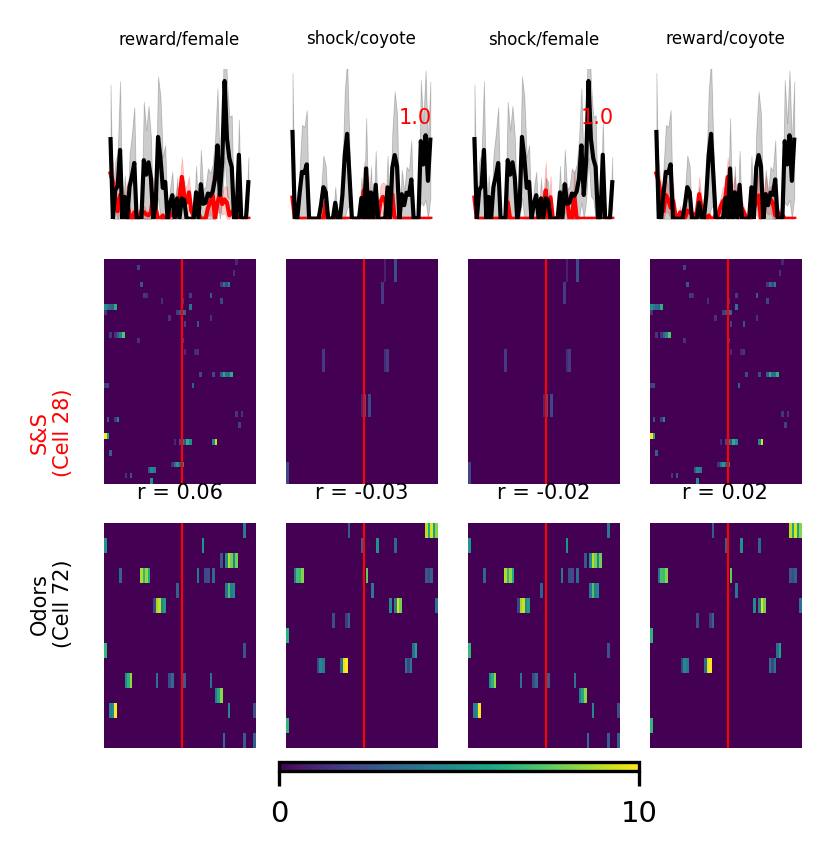

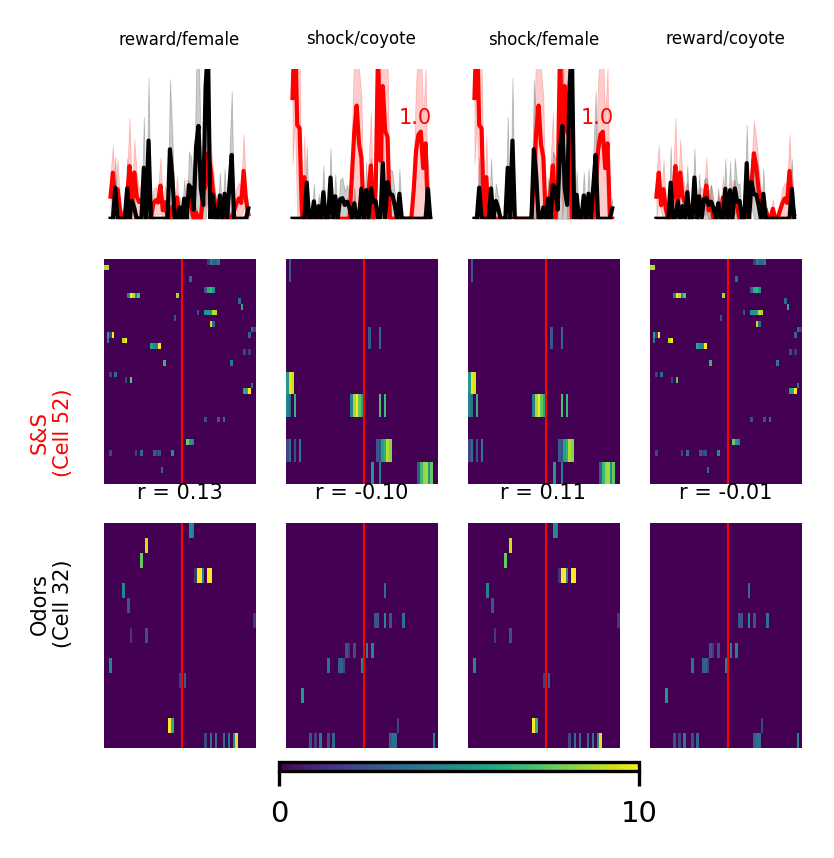

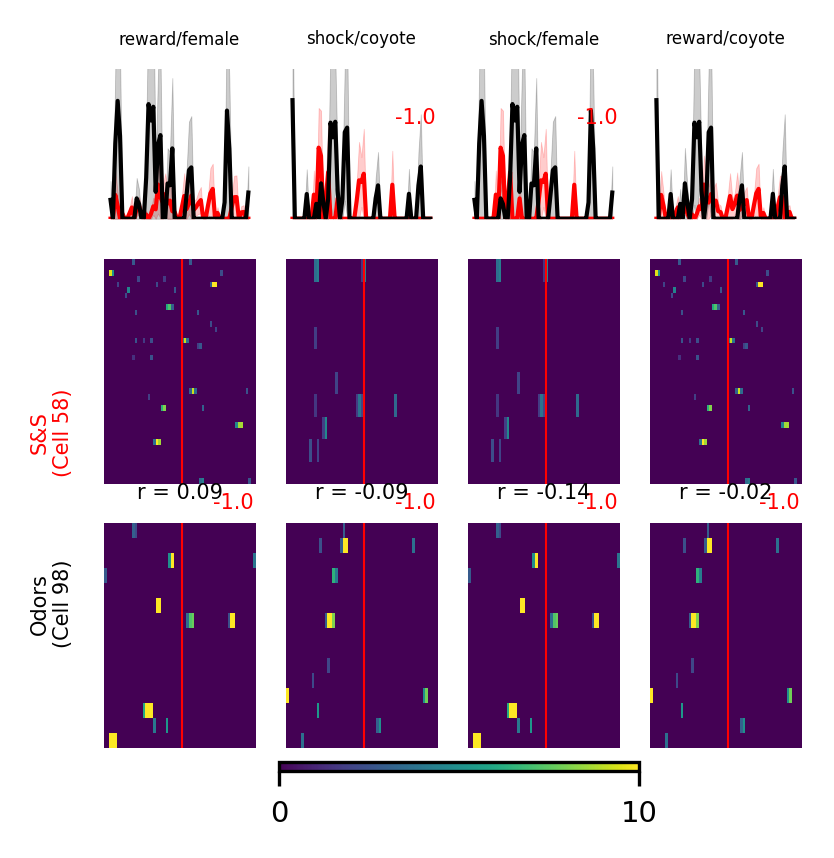

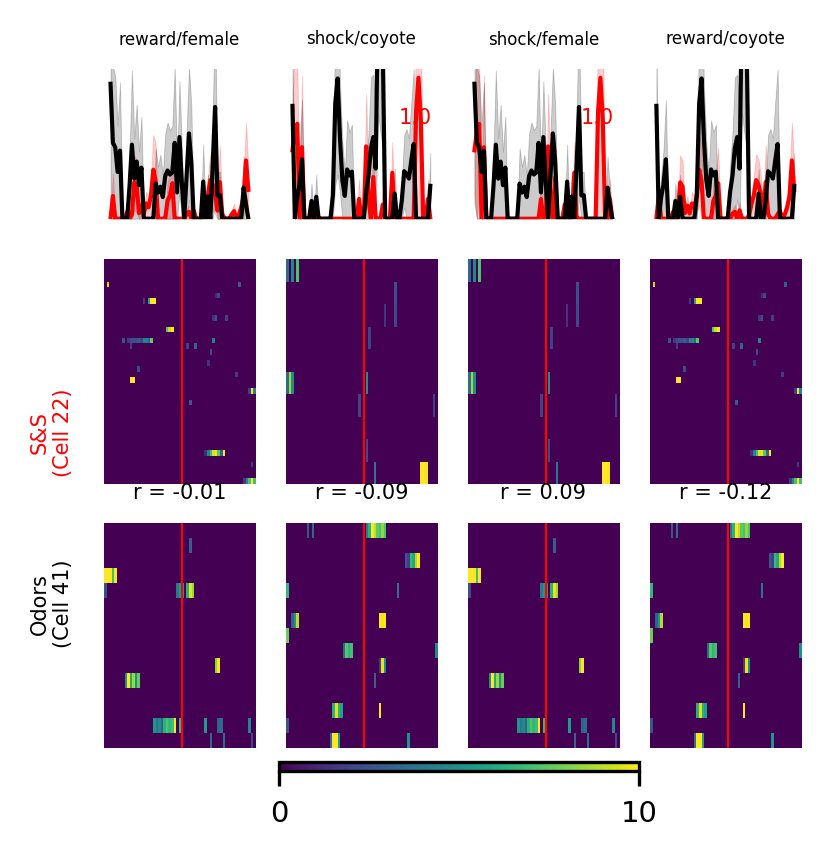

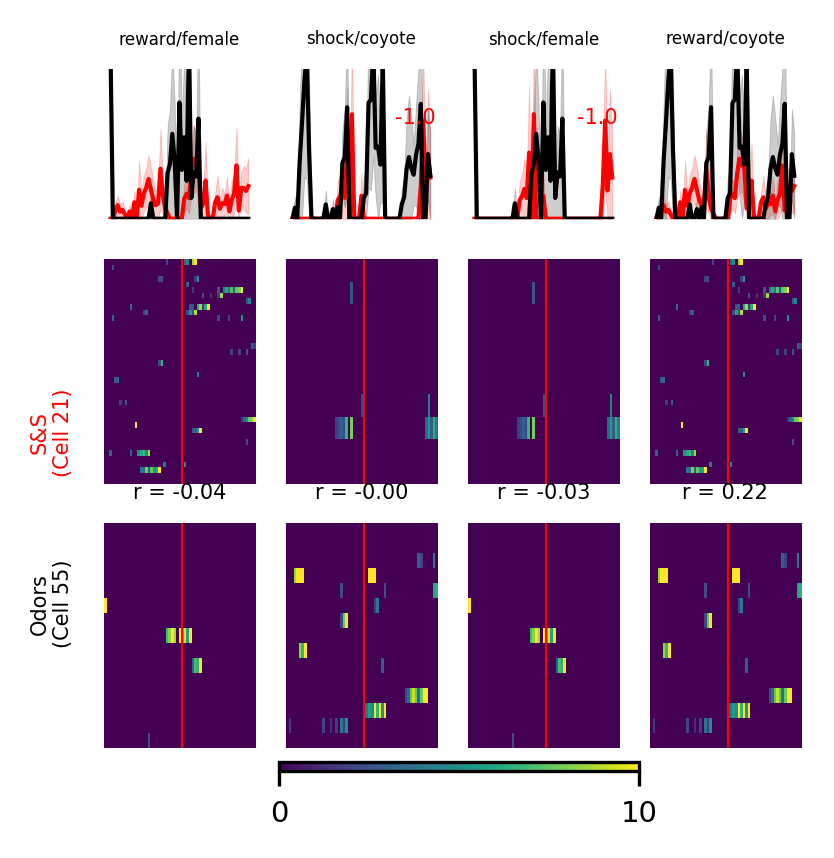

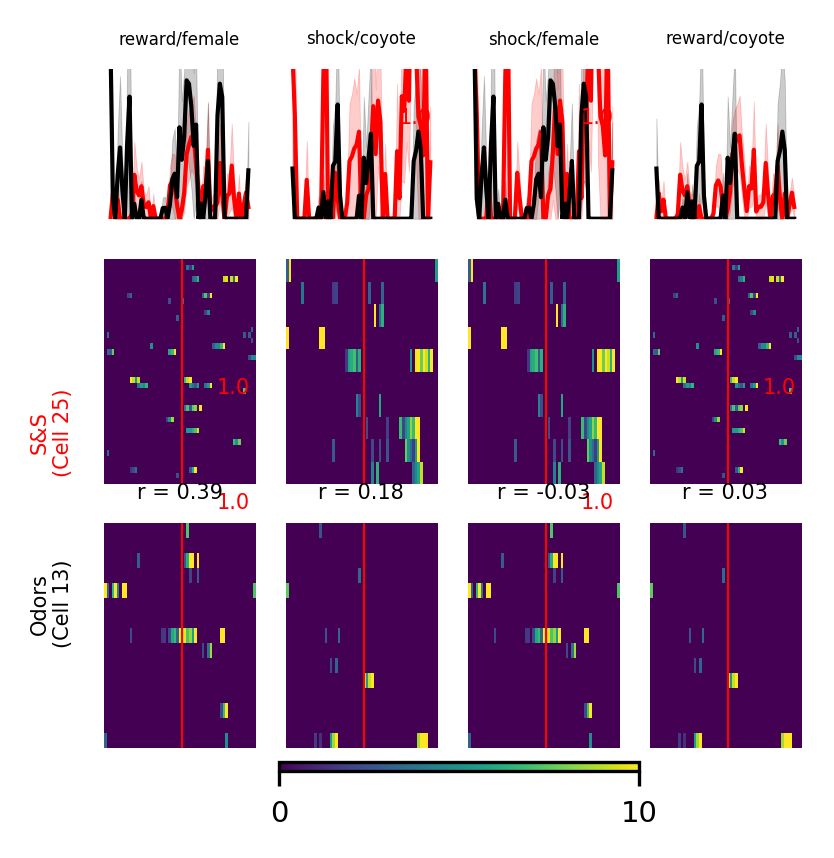

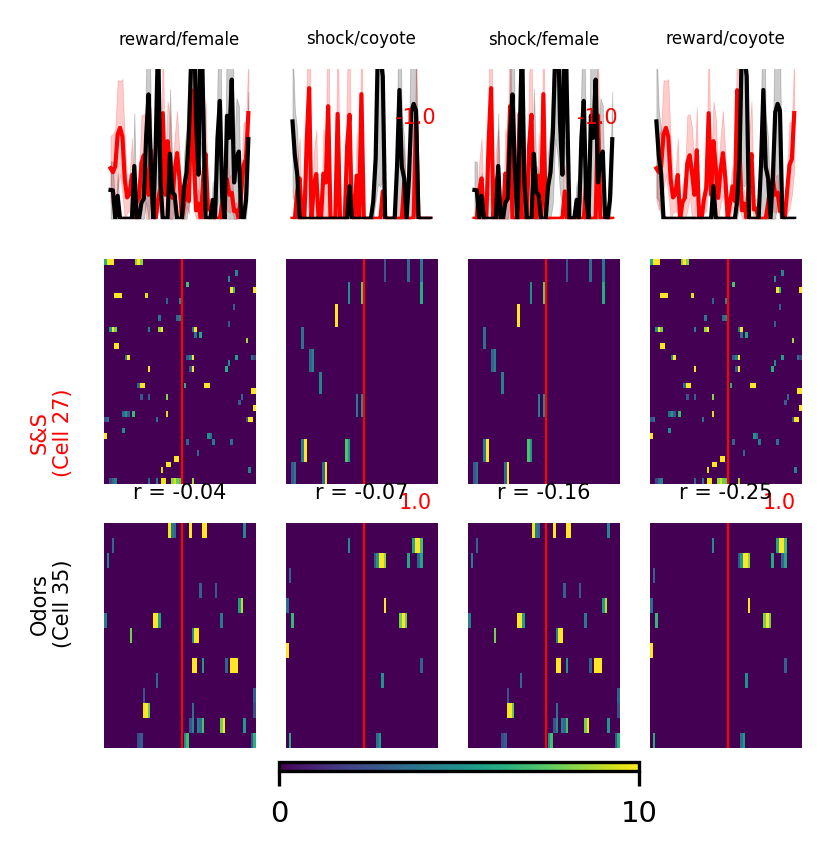

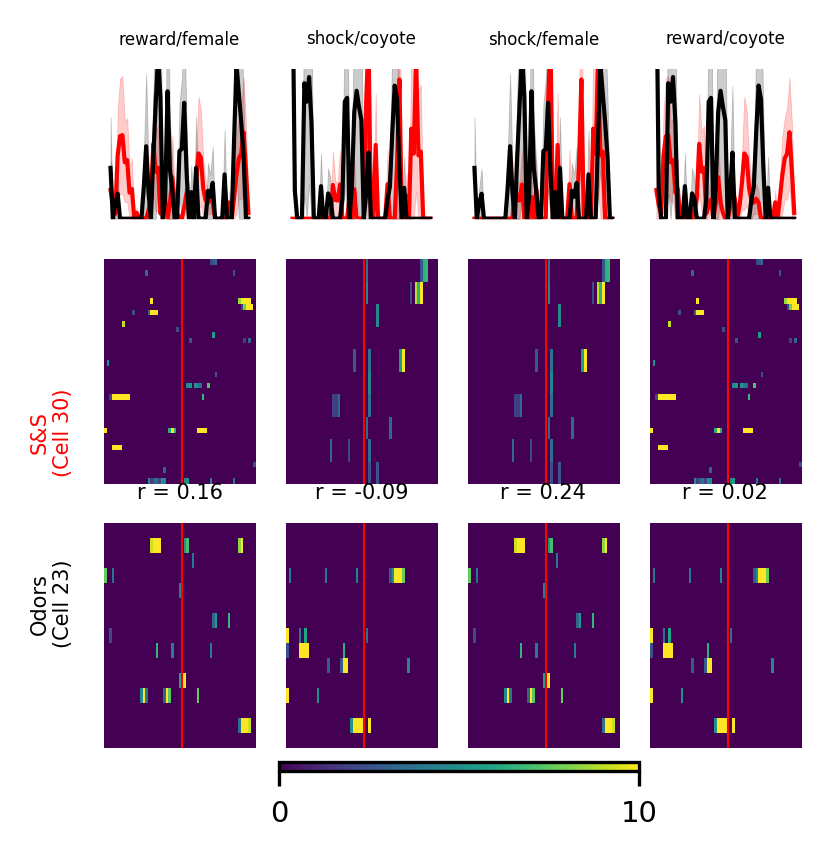

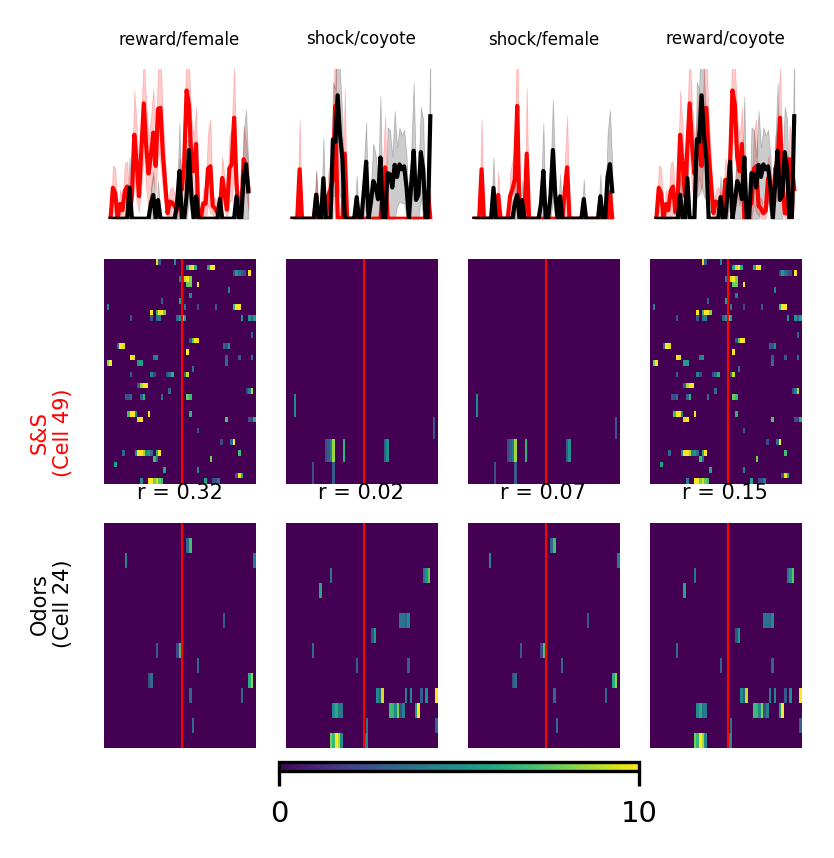

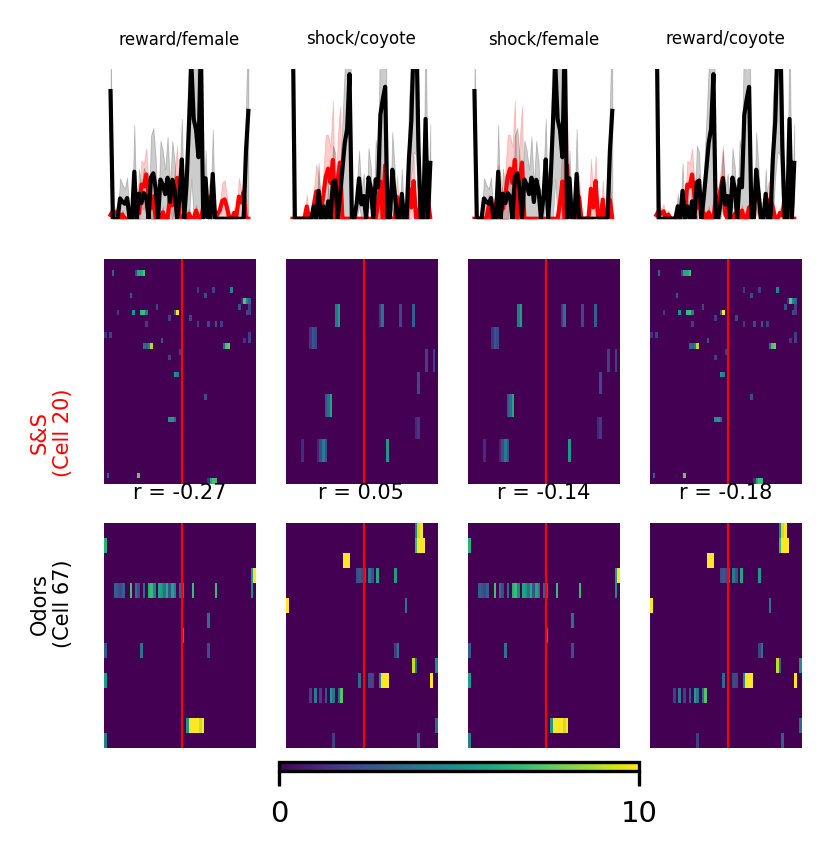

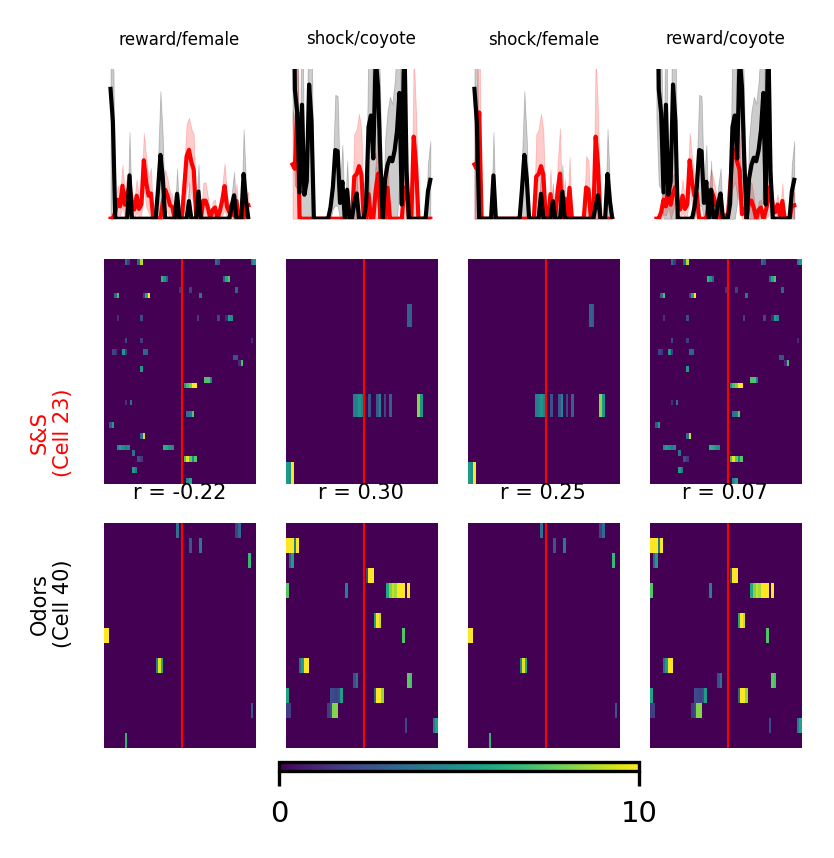

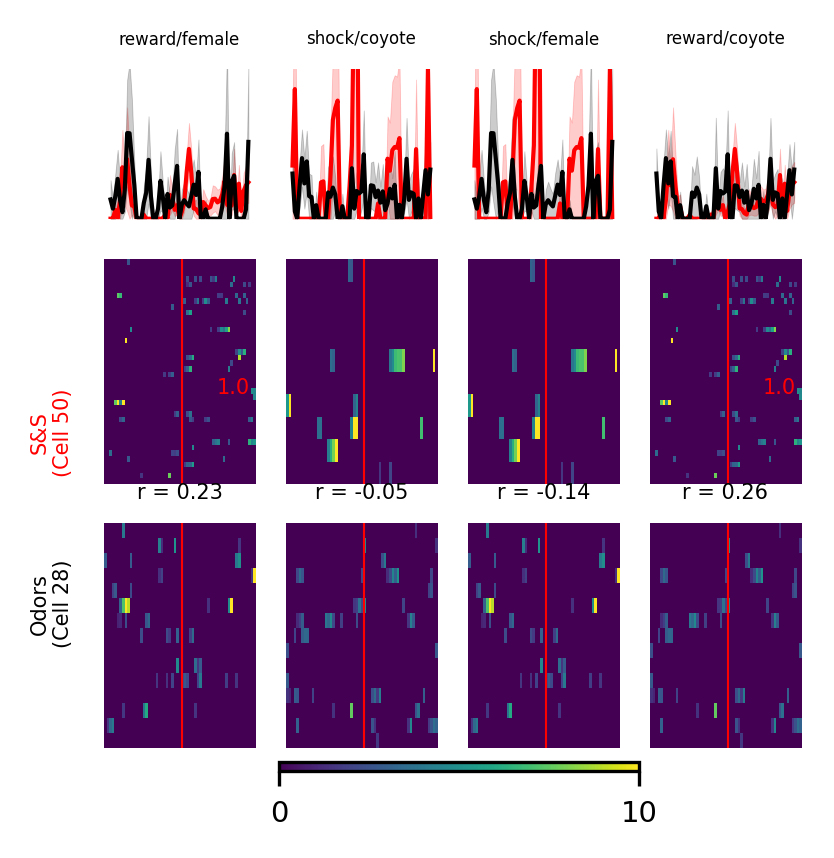

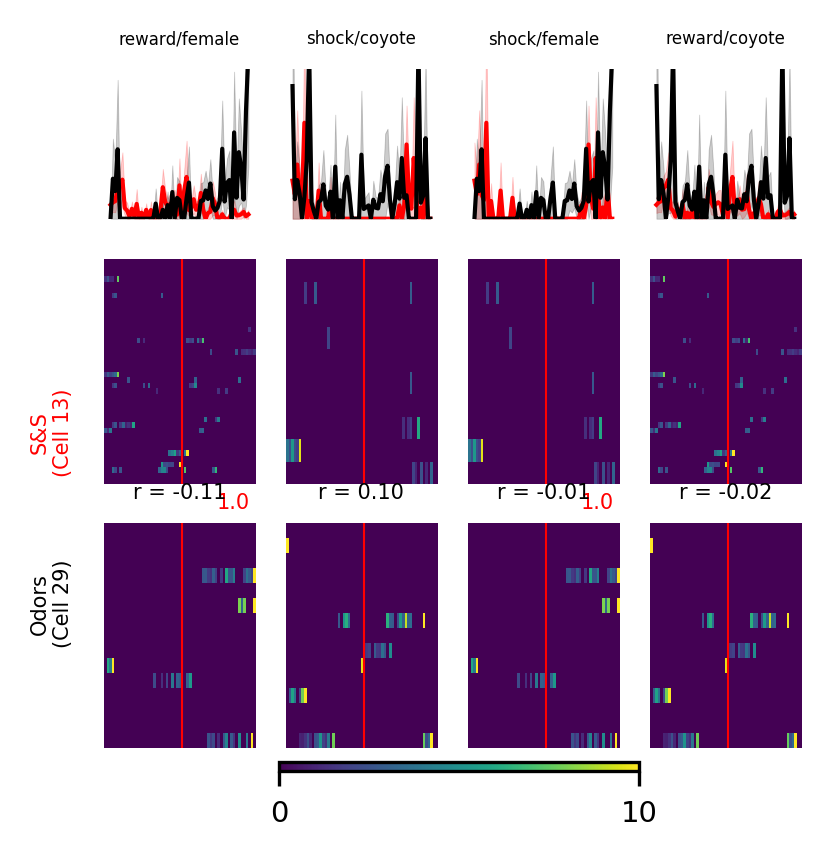

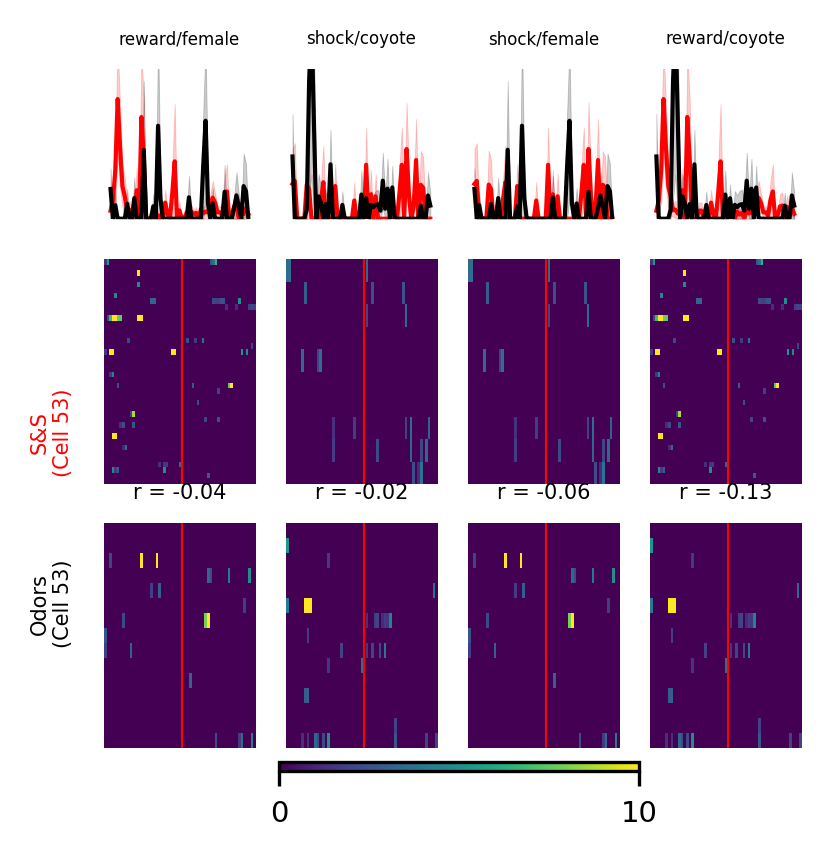

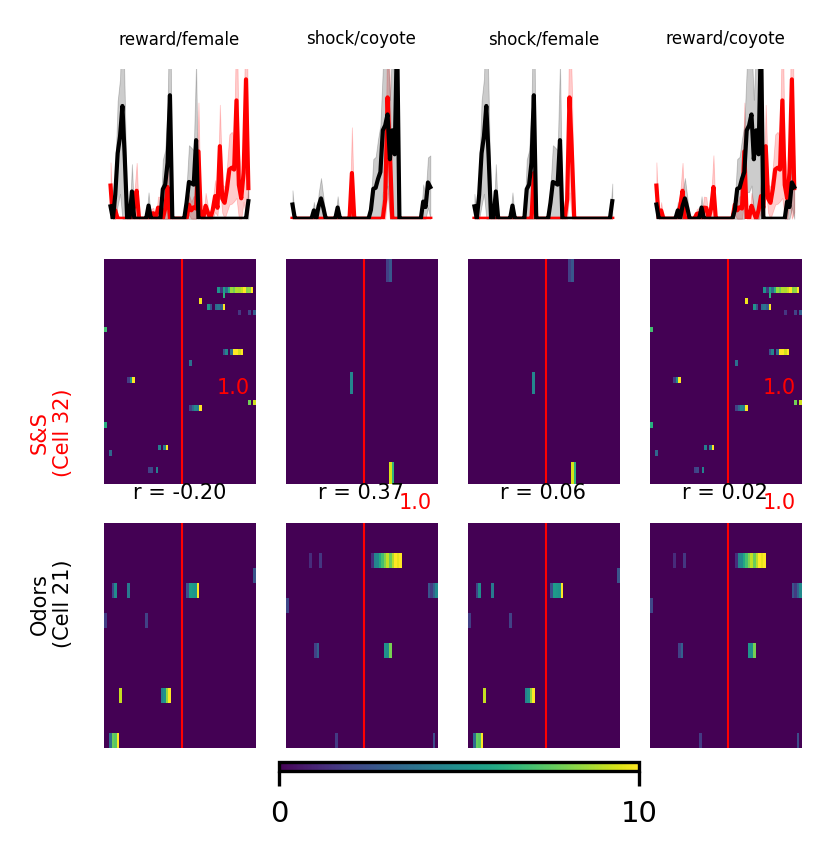

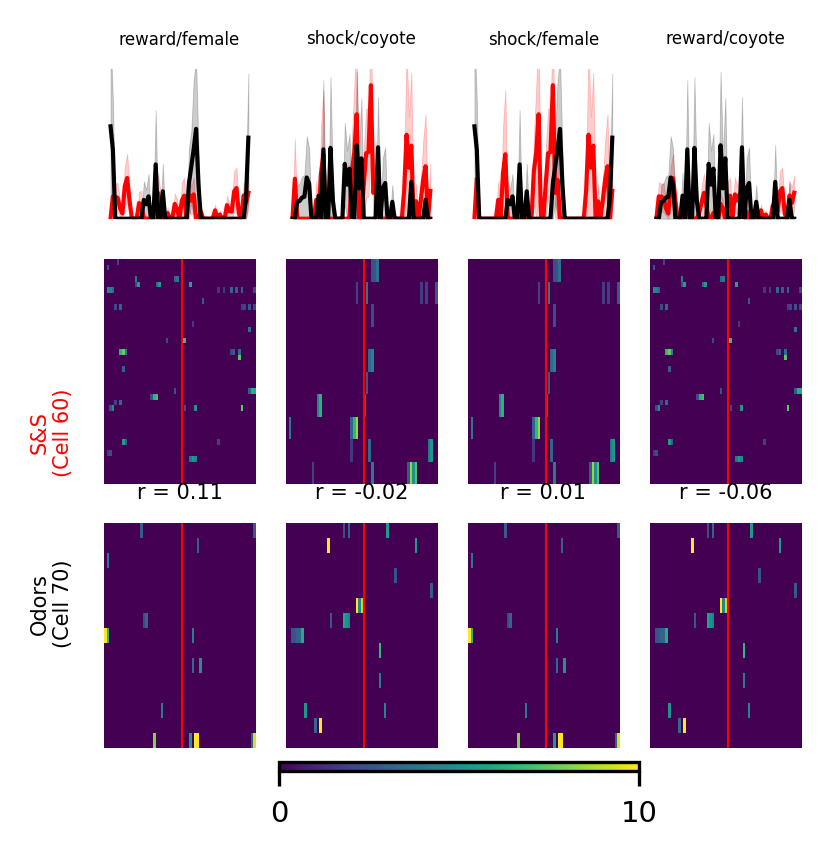

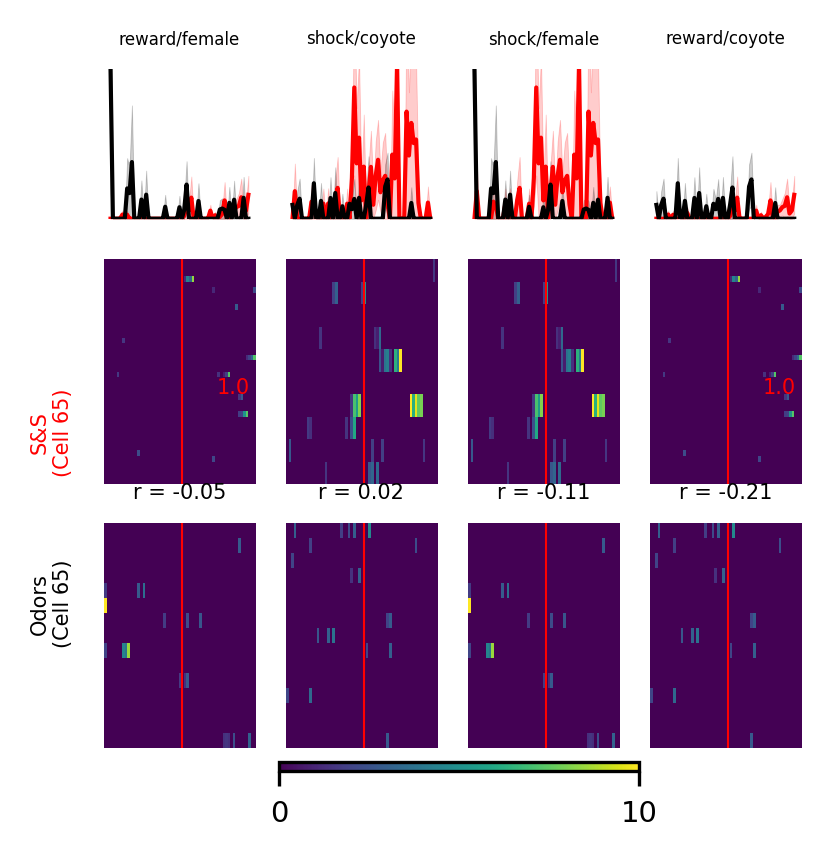

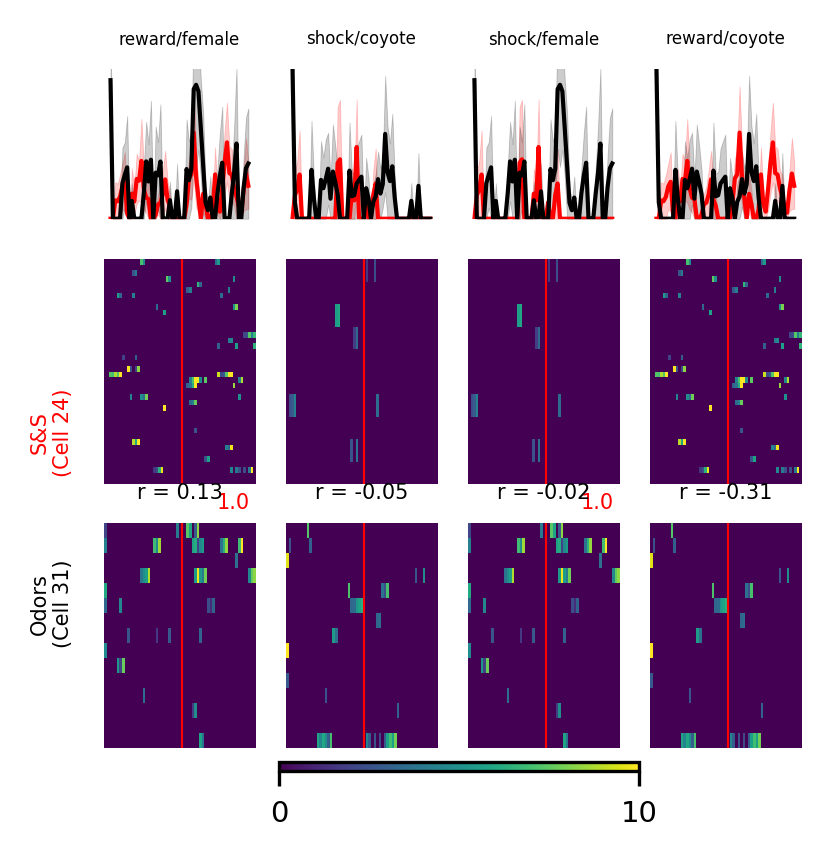

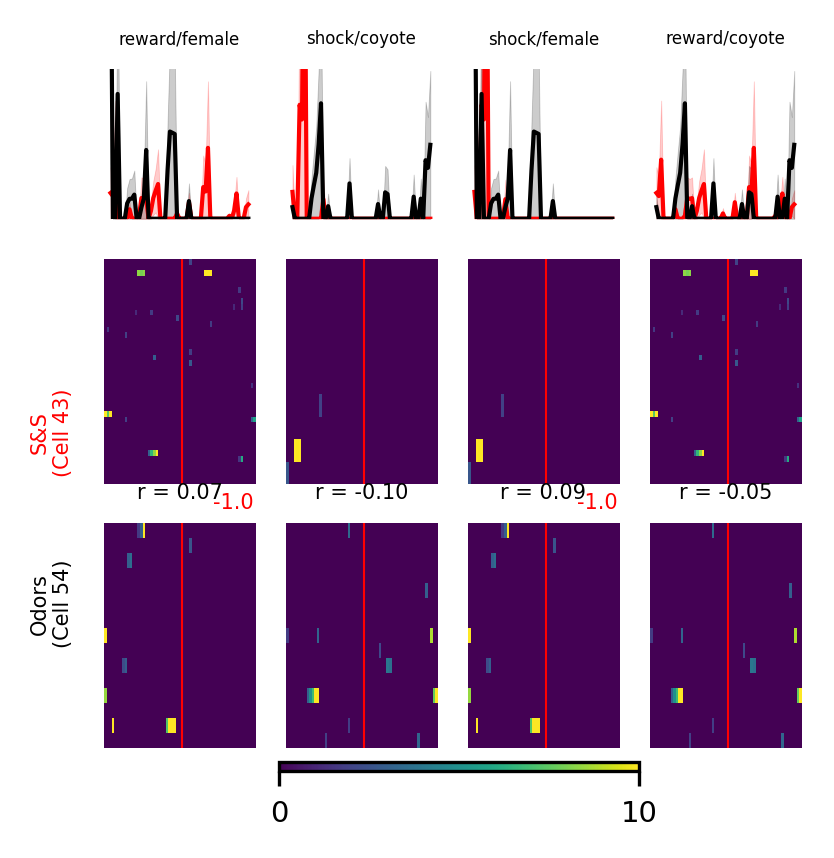

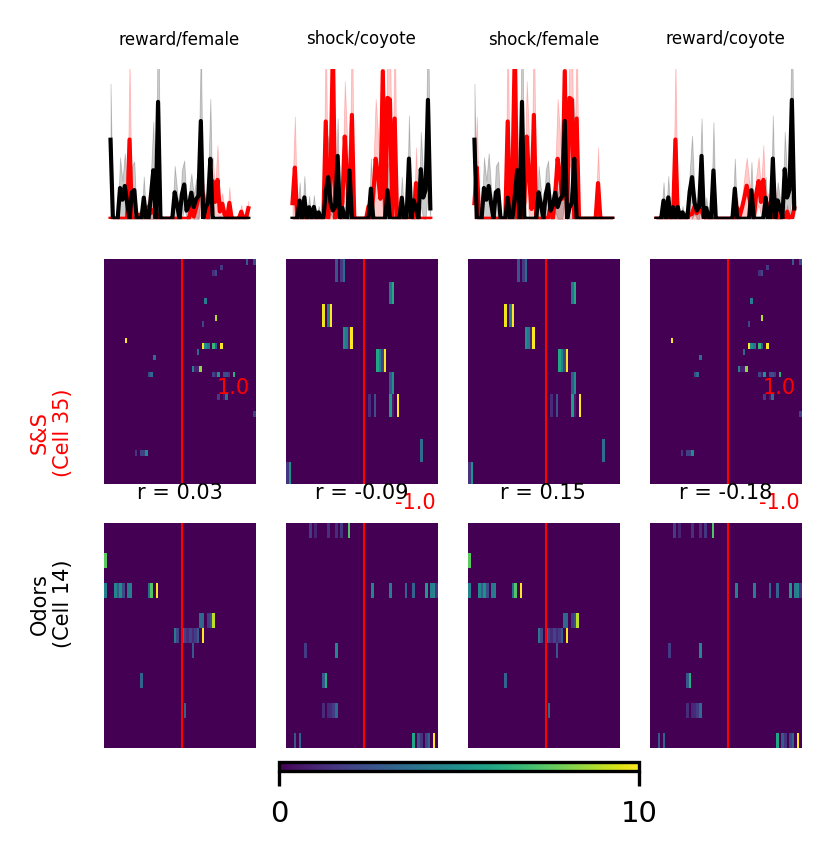

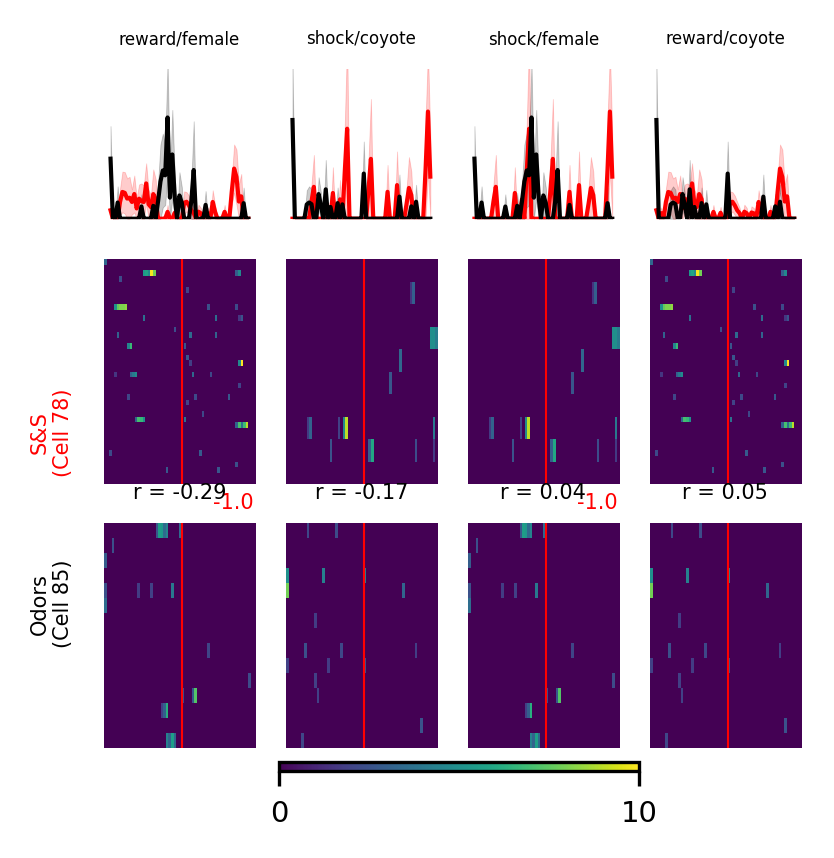

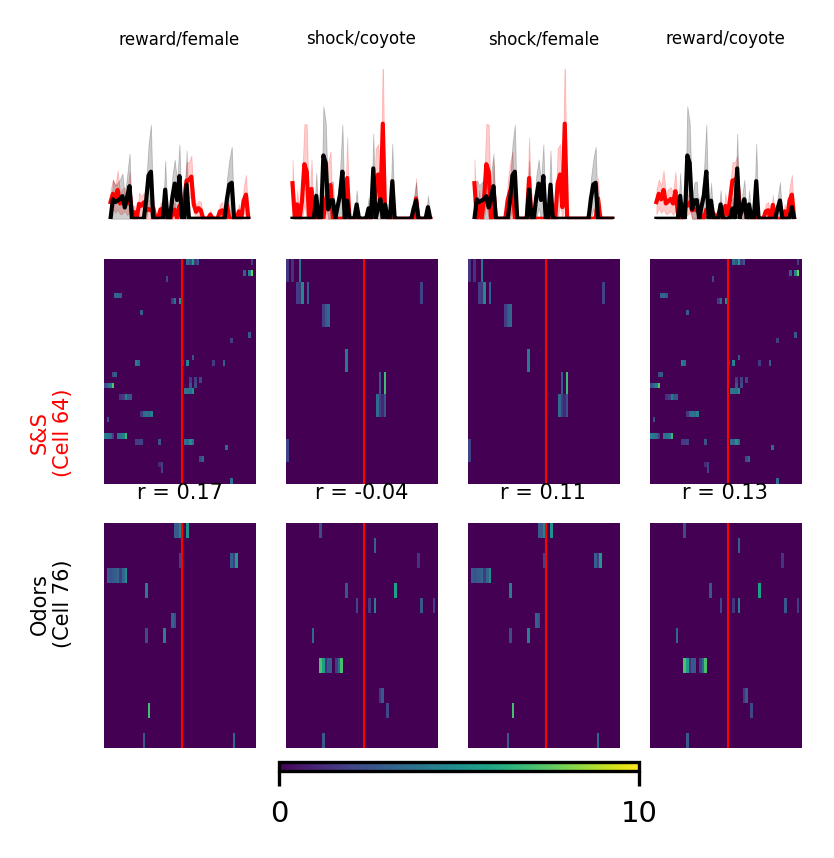

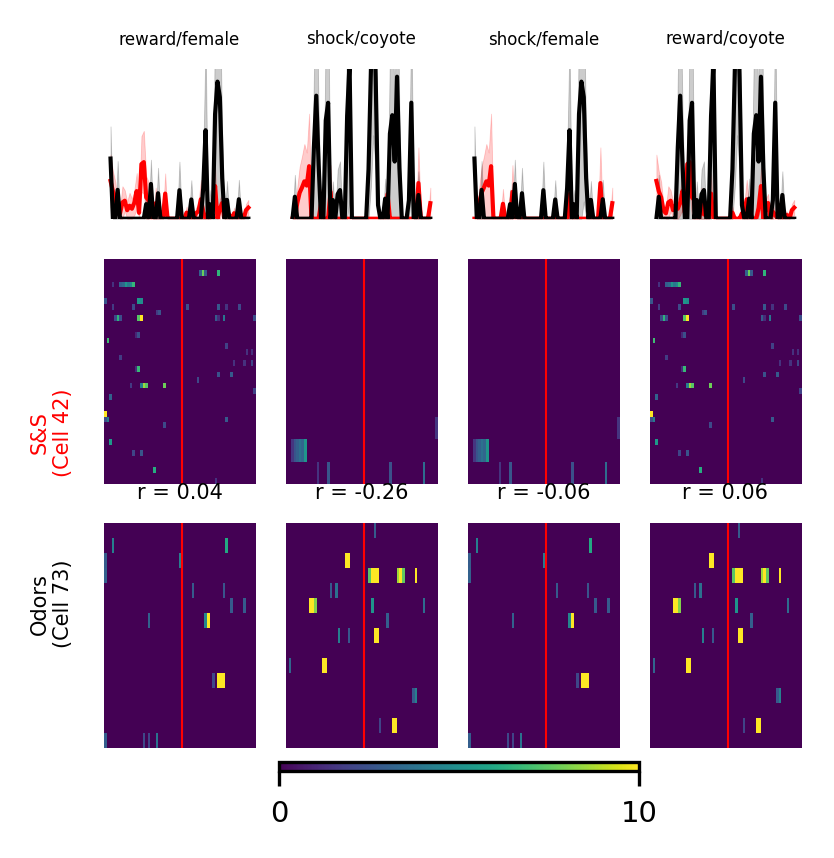

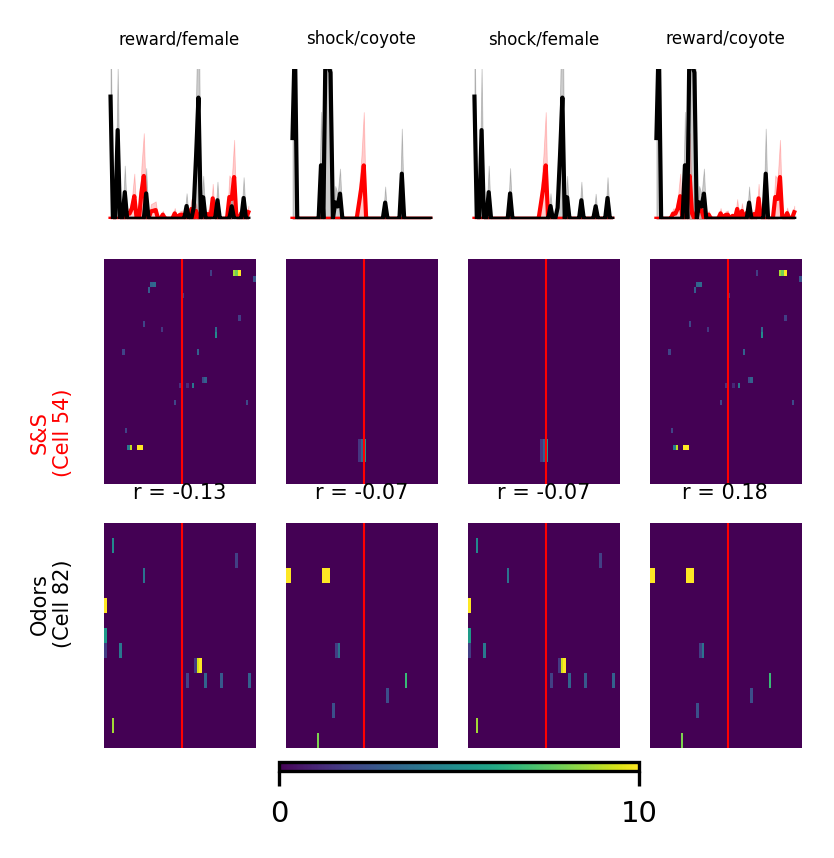

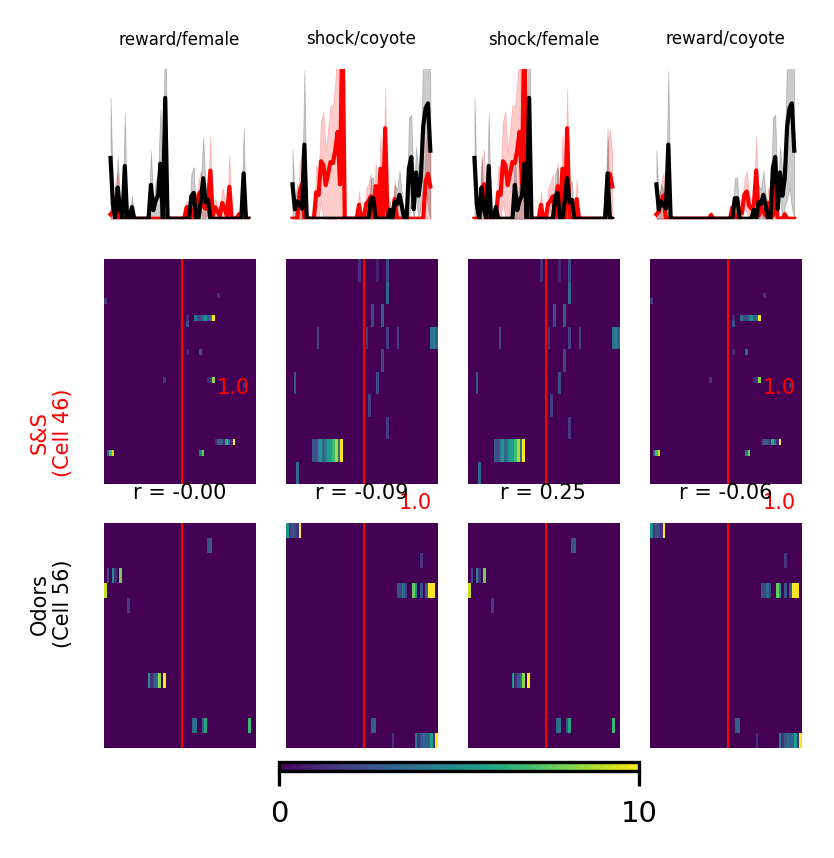

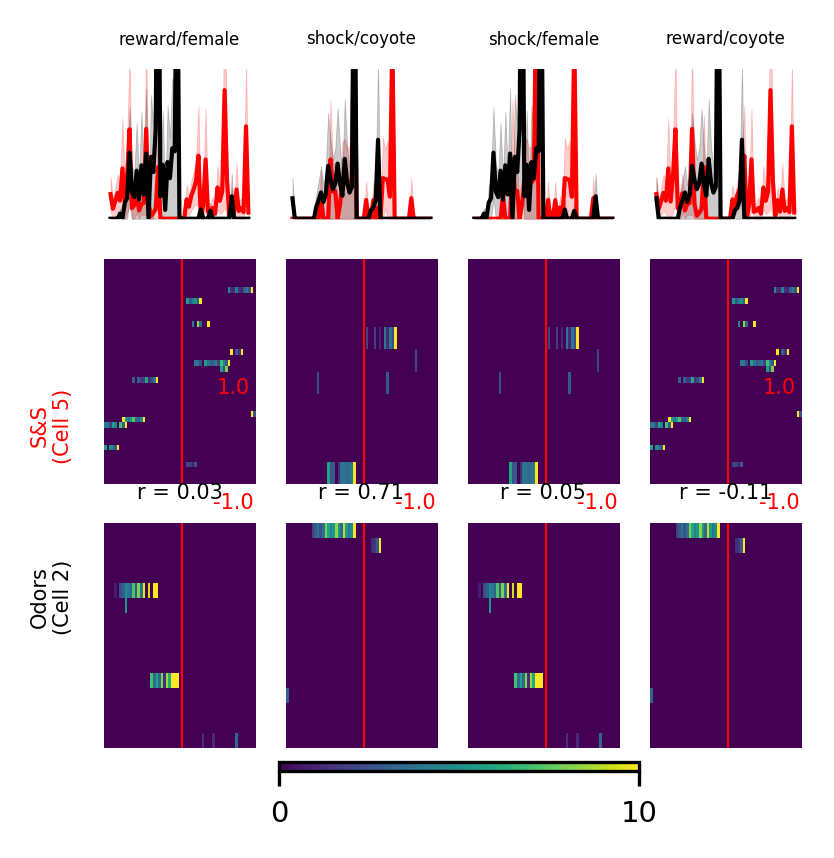

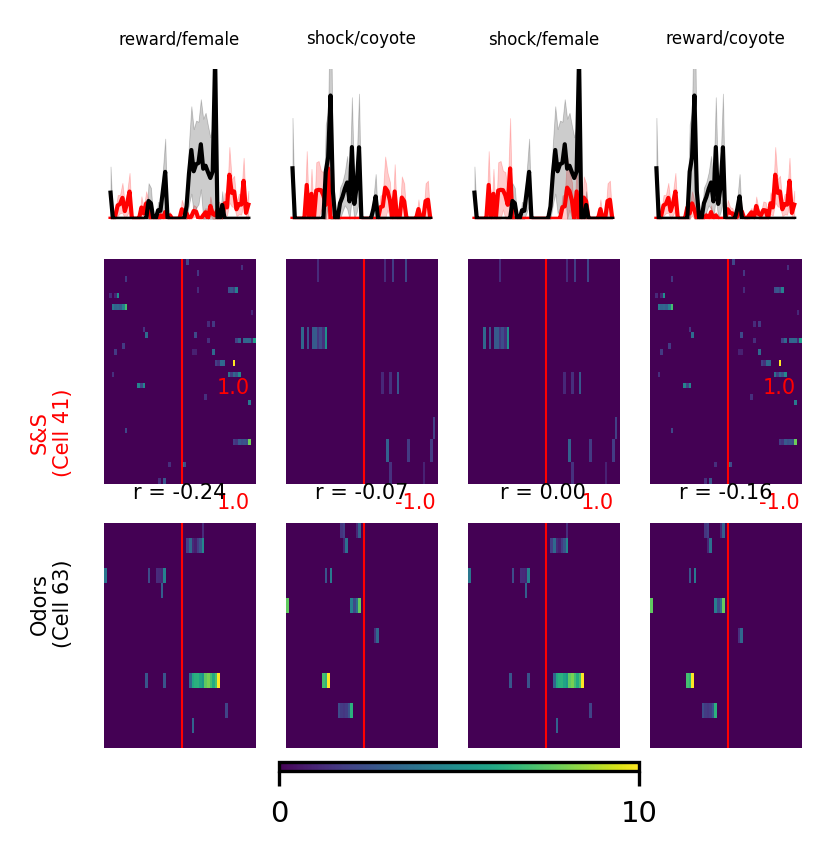

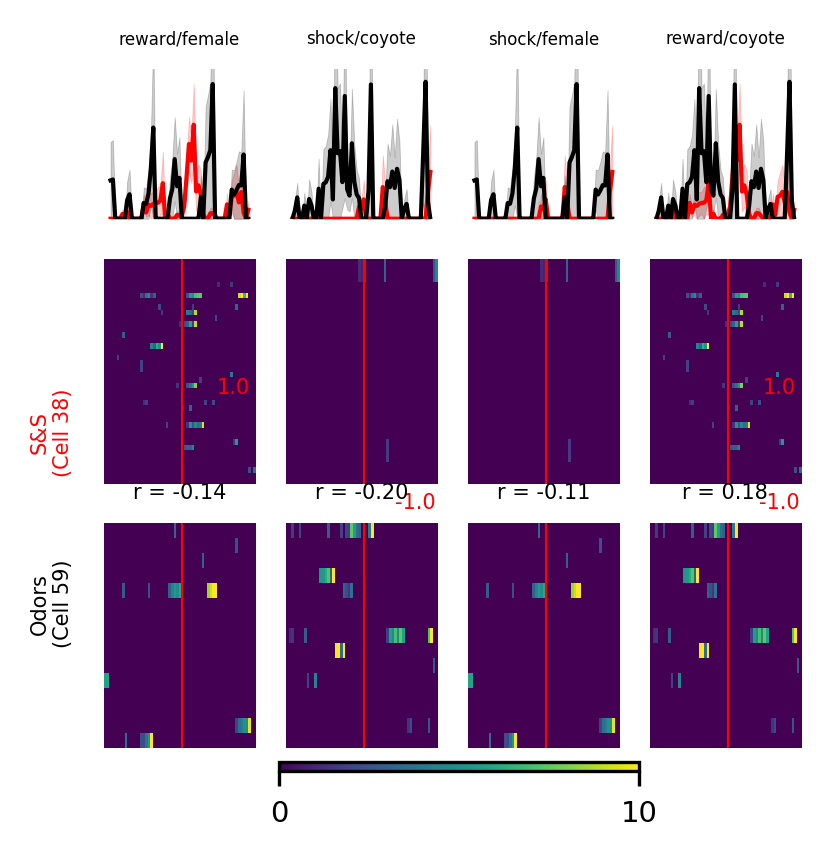

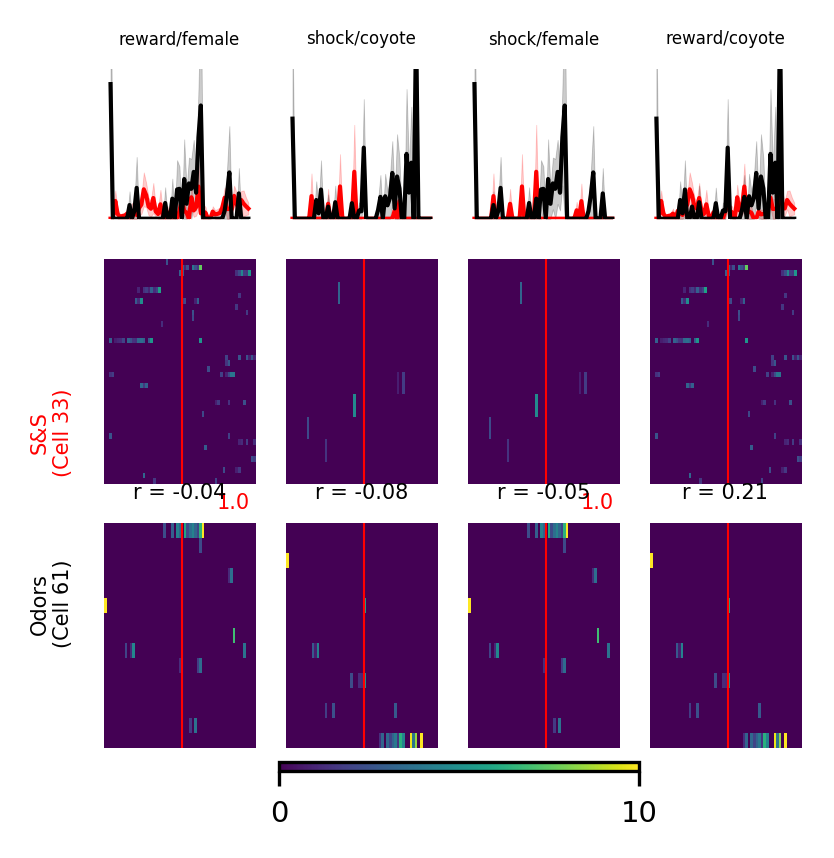

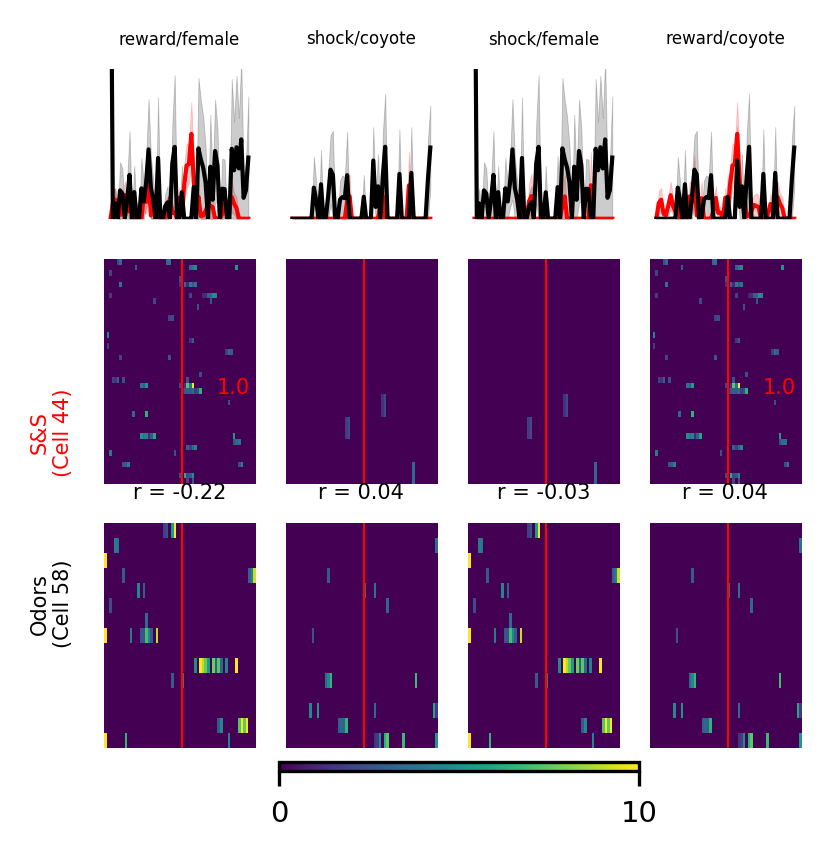

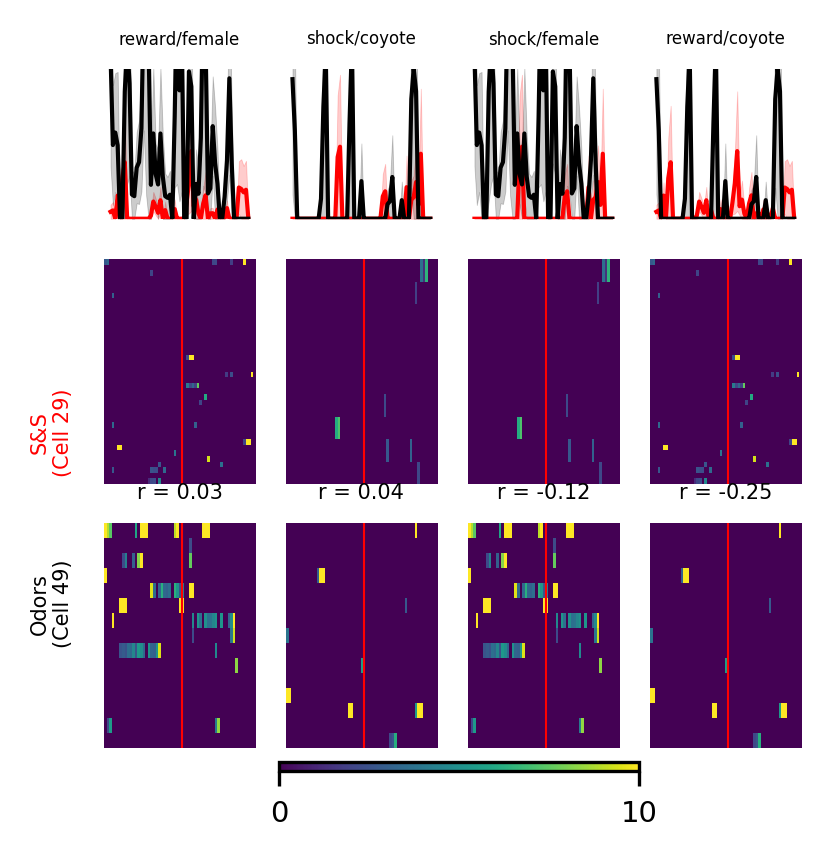

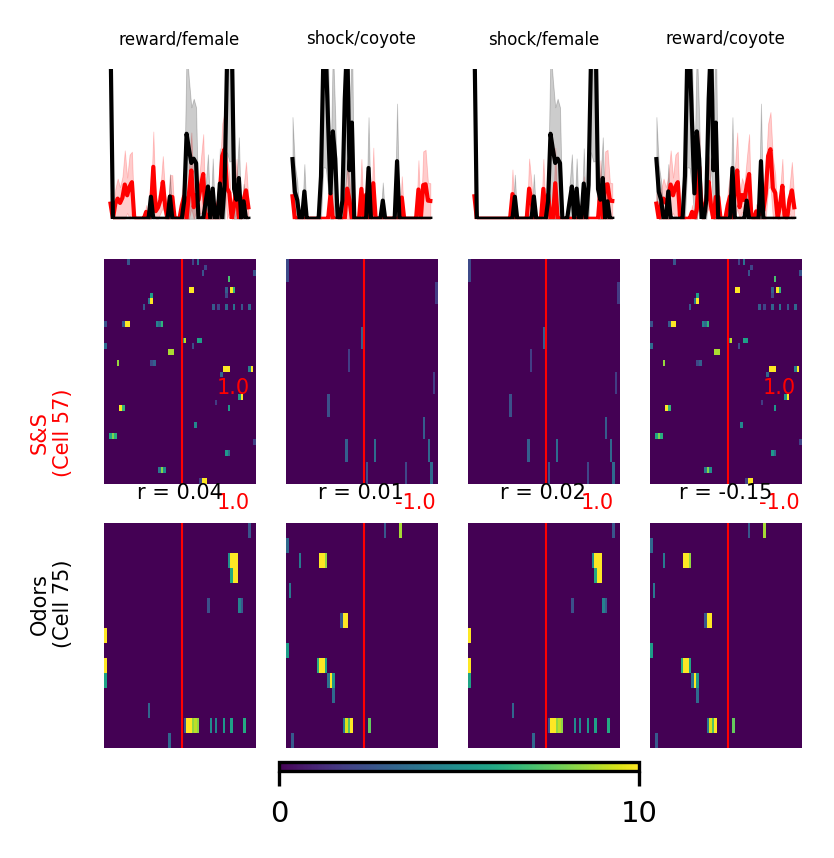

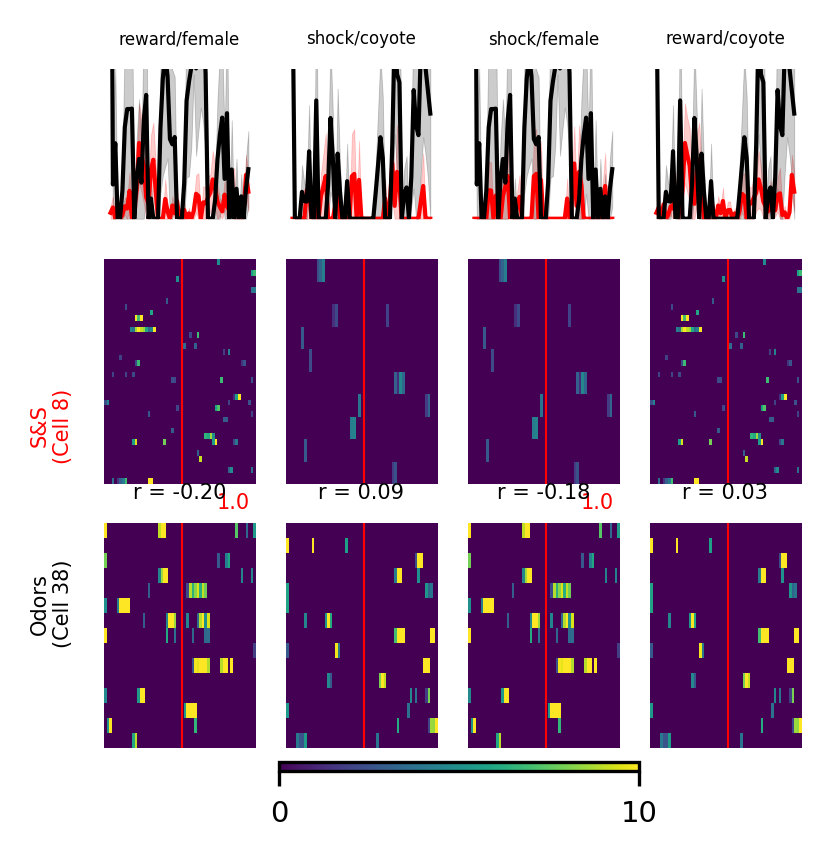

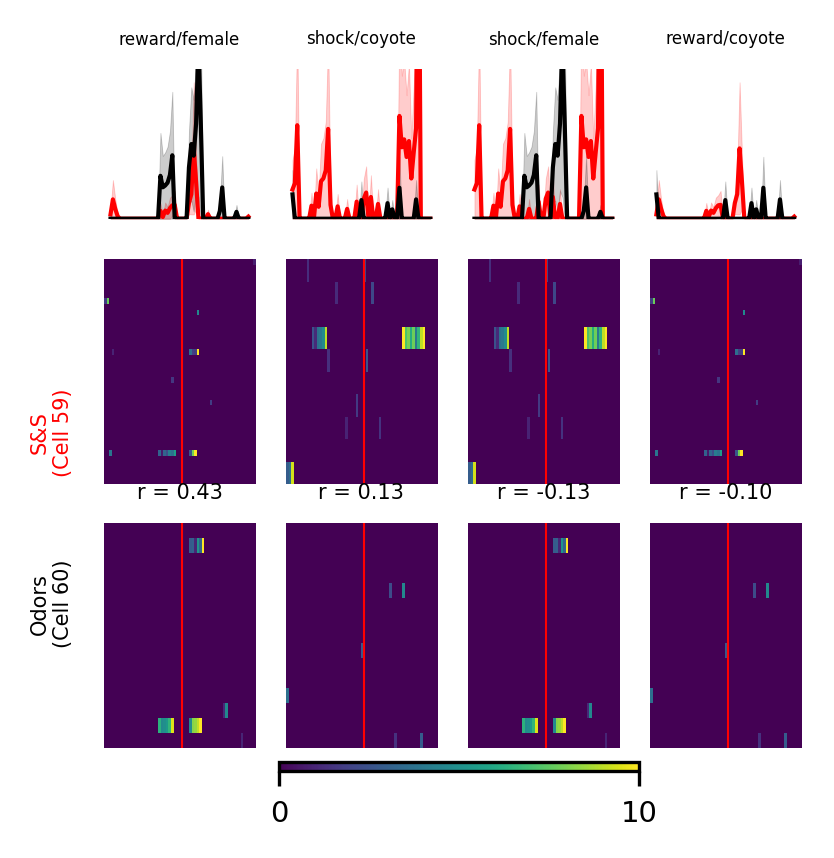

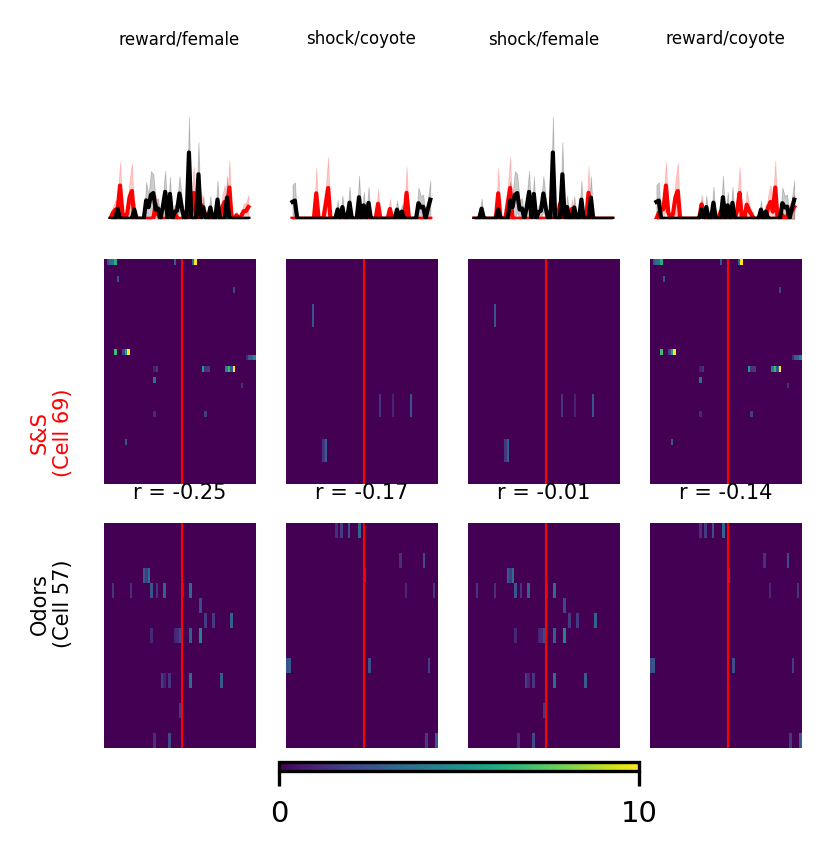

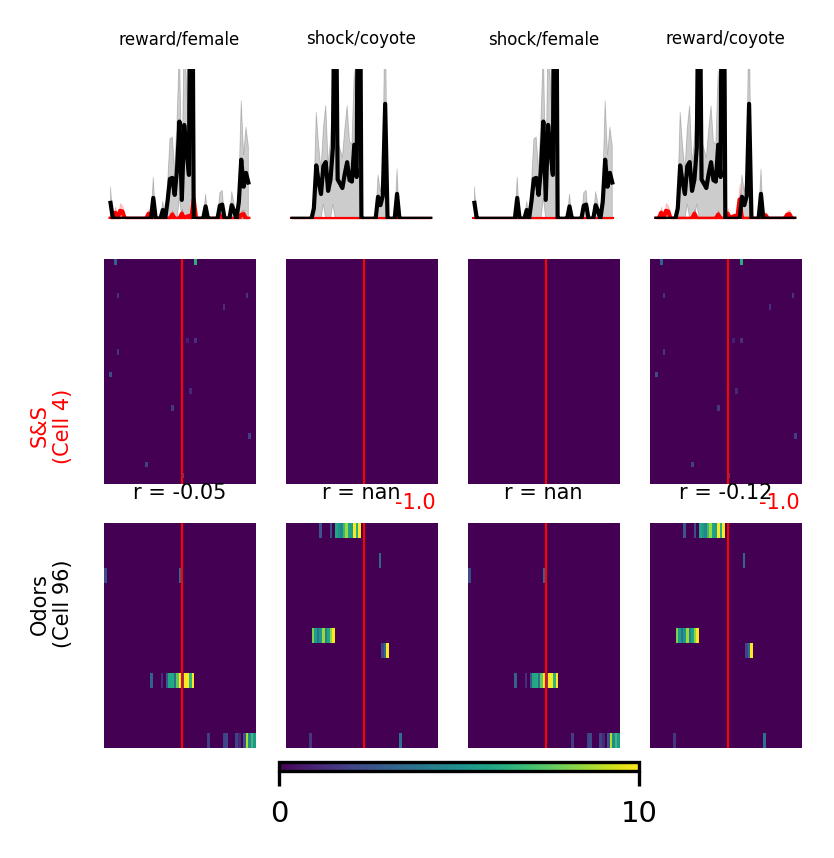

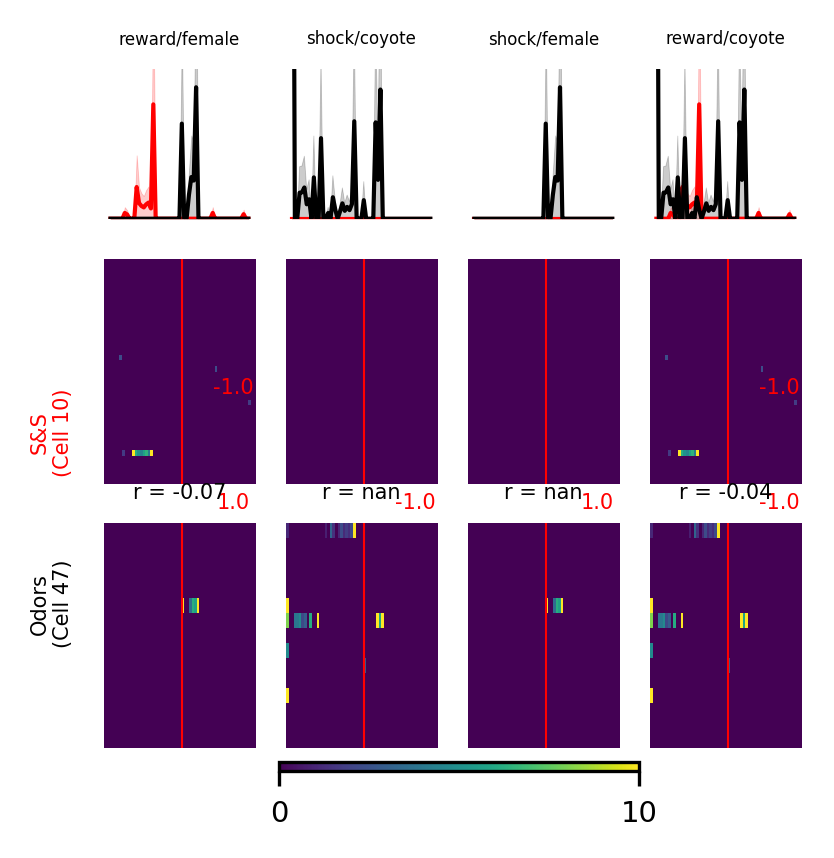

In [15]:
## here, cell_pre became cell_SS and cell_post became cell_O

best_coyotet = np.argsort([p[-1] for p in vars_O['selectivity']['coyote_4s_us'][:, 0]])
best_rewardt = np.argsort([p[-1] for p in vars_SS['selectivity']['reward_4s_us'][:, 0]])
best_shockt = np.argsort([p[-1] for p in vars_SS['selectivity']['shock_4s_us'][:, 0]])
best_femalet = np.argsort([p[-1] for p in vars_O['selectivity']['female_4s_us'][:, 0]])
# cells = np.r_[[[b for b in best_CSmt if b in cellregs['pre']],
#          [b for b in best_rewardt if b in cellregs['pre']],
#          [b for b in best_rewarded if b in cellregs['pre']]]].flatten()
cells = [b for b in best_shockt if b in cellregs['SS']]

vmax = 10
color_odor = 'black'
color_SS = 'red'
# for cell_pre in best_rhos_odor1:  # use this if you want to create all PDFs for all cells
sel_coyote = [p[1] if p[0][-1]<0.05 else "" for p in vars_O['selectivity']['coyote_4s_us']]
sel_reward = [p[1] if p[0][-1]<0.05 else "" for p in vars_SS['selectivity']['reward_4s_us']]
sel_shock = [p[1] if p[0][-1]<0.05 else "" for p in vars_SS['selectivity']['shock_4s_us']]
sel_female = [p[1] if p[0][-1]<0.05 else "" for p in vars_O['selectivity']['female_4s_us']]
#sel_rewarded_pre = [p[1] if p[0][-1]<0.05 else "" for p in vars_pre['selectivity']['rewarded']]
#sel_rewarded_post = [p[1] if p[0][-1]<0.05 else "" for p in vars_post['selectivity']['rewarded']]

for cell_SS in cells:
#for cell_SS in range(2):  # use this if you want to be quick

    cell_O = cellregs['O'][np.where(cellregs['SS']==cell_SS)[0][0]]    
    
    fig, axs = pl.subplots(3, 4, figsize=(3, 3), gridspec_kw={'height_ratios':(2, 3, 3)})

    for k in vars_SS.keys():
        exec('%s = vars_SS[\'%s\']' % (k, k))

    mpres = []
    for iso, ax, ax0 in zip([is_rewardt, is_shockt, is_shockt, is_rewardt], axs[1], axs[0]):
#         pt.plot_heat_map(time_ax, traces, cell_pre, cycles[iso], time_ax_single, vmax=50, ax=ax)
        alldffs = ut.compute_all_dffs(time_ax, events, cell_SS, cycles[iso], time_ax_single)
        ax.imshow(alldffs, origin='lower', aspect='auto',
                  extent=(time_ax_single[0], time_ax_single[-1], 0, len(cycles[iso])), vmax=vmax, vmin=0)
#         ax.text(-4.7, 1.7, cell_pre+1, color='y', fontsize=5)
        ax0.plot(time_ax_single, np.mean(alldffs, 0)*10, lw=1, color=color_SS)
        m = np.mean(alldffs, 0)
        s = np.std(alldffs, 0)/np.sqrt(np.sum(iso)-1)
        ax0.fill_between(time_ax_single, (m-s)*10, (m+s)*10,
                         lw=0.2, color=color_SS, zorder=0, alpha=0.2)
        ax0.set_ylim(0, vmax*1.5)
        ax.vlines([vars_SS['US_START']], 0, np.sum(iso), color='r', lw=0.5)
        mpres.append(m)

    for k in vars_O.keys():
        exec('%s = vars_O[\'%s\']' % (k, k))

    for iso, ax, ax0, mpre in zip([is_femalet, is_coyotet, is_femalet, is_coyotet], axs[2], axs[0], mpres):
#         pt.plot_heat_map(time_ax, traces, cell_post, cycles[iso], time_ax_single, vmax=50, ax=ax)
        alldffs = ut.compute_all_dffs(time_ax, events, cell_O, cycles[iso], time_ax_single)
        im = ax.imshow(alldffs, origin='lower', aspect='auto',
                  extent=(time_ax_single[0], time_ax_single[-1], 0, len(cycles[iso])), vmax=vmax, vmin=0)
        ax0.plot(time_ax_single, np.mean(alldffs, 0)*10, lw=1, color=color_odor)
        m = np.mean(alldffs, 0)
        s = np.std(alldffs, 0)/np.sqrt(np.sum(iso)-1)
        ax0.fill_between(time_ax_single, (m-s)*10, (m+s)*10,
                         lw=0.2, color=color_odor, zorder=0, alpha=0.2)
#         ax.text(-4.7, 1.7, cell_post+1, color='y', fontsize=5)
        ax.set_title("r = %.2f"%sstats.pearsonr(mpre[:len(m)], m[:len(mpre)])[0], fontsize=5)
        ax.vlines([vars_SS['US_START']], 0, np.sum(iso), color='r', lw=0.5)
    
    axs[1][0].text(4, len(alldffs)+1, sel_reward[cell_SS], ha='center', fontsize=5, color='r')
    axs[2][0].text(4, len(alldffs)+1, sel_female[cell_O], ha='center', fontsize=5, color='r')
    axs[1][1].text(4, len(alldffs)+1, sel_shock[cell_SS], ha='center', fontsize=5, color='r')
    axs[2][1].text(4, len(alldffs)+1, sel_coyote[cell_O], ha='center', fontsize=5, color='r')
    axs[1][2].text(4, len(alldffs)+1, sel_shock[cell_SS], ha='center', fontsize=5, color='r')
    axs[2][2].text(4, len(alldffs)+1, sel_female[cell_O], ha='center', fontsize=5, color='r')
    axs[1][3].text(4, len(alldffs)+1, sel_reward[cell_SS], ha='center', fontsize=5, color='r')
    axs[2][3].text(4, len(alldffs)+1, sel_coyote[cell_O], ha='center', fontsize=5, color='r')
        
    for ax in axs.flatten():
        pt.remove_axes(ax)

    axs[1][0].text(-10, 10, 'S&S\n(Cell %d)' % (cell_O+1), fontsize=5, color = 'r', ha='center', rotation = 90)
    axs[2][0].text(-10, 10, 'Odors\n(Cell %d)' % (cell_SS+1), fontsize=5, ha='center', rotation = 90)

    axs[0][0].set_title('reward/female', fontsize=4)
    axs[0][1].set_title('shock/coyote', fontsize=4)
    axs[0][2].set_title('shock/female', fontsize=4)
    axs[0][3].set_title('reward/coyote', fontsize=4)

    ax = fig.add_axes([0.32, 0.1, 0.4, 0.01])
    pl.colorbar(im, cax=ax, orientation='horizontal', ticks=[0, im.get_clim()[1]])
    pt.remove_axes(ax)
#     pl.tight_layout()
    
    pl.savefig('../img/psth_Odor_Vs_SS_cell%03dSS.pdf'%(cell_SS+1))
    
    print ".",

In [16]:
#use this to create a booklet
!pdftk ../img/psth_Odor_Vs_SS_cell*.pdf cat output ../img/psth_Odor_Vs_SS_booklet.pdf

In [17]:
save_workspace(db)

Could not store variable 'di'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'json'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
